In [1]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-10-14 15:25:58.423778: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# importing libraries
from time import time
import multiprocessing
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from glob import glob
import skimage
import torch
from keras.models import load_model
import SimpleITK as sitk
import skimage, torch, torchvision
import torchxrayvision as xrv
import torchvision
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
import random
import logging
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,auc,accuracy_score,classification_report,confusion_matrix
import tensorflow as tf
from keras.models import load_model
from tensorflow import keras
from sklearn.model_selection import train_test_split

2023-10-14 16:00:55.649847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def AUC_ROC_Binary(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    fpr, tpr, thresholds = roc_curve(y_true, y_score,pos_label=1)
    score_value = roc_auc_score(y_true=y_true, y_score=y_score)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr,label="Male (class 1) vs Female (class 0) \n (AUC={:.2f})".format(score_value))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC-ROC for the Prediction Gender (Male vs Female)')
    plt.plot(y_score,y_score,'--k')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def AUC_Precision_Recall(y_true,y_score):
    y_true=y_true.reshape((-1,1))
    y_score=y_score.reshape((-1,1))
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    plt.figure(dpi=150)
    auc_score = auc(y=precision, x=recall)
    # ,label="White vs African-American/Asian \n (AUC={:.2f})".format(score_value)
    plt.plot(recall[::5],precision[::5],label="Male vs Female \n (precision-recall AUC={:.2f})".format(auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('AUC-ROC for the Prediction of Gender (Male vs Female)')
    plt.grid(which='both')
    plt.legend()
    plt.show()

def prob2categ(y_true,y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    gmeans = np.sqrt(tpr * (1-fpr))
    return gmeans[np.argmax(gmeans)]



209/209 [==============================] - 0s 1ms/step


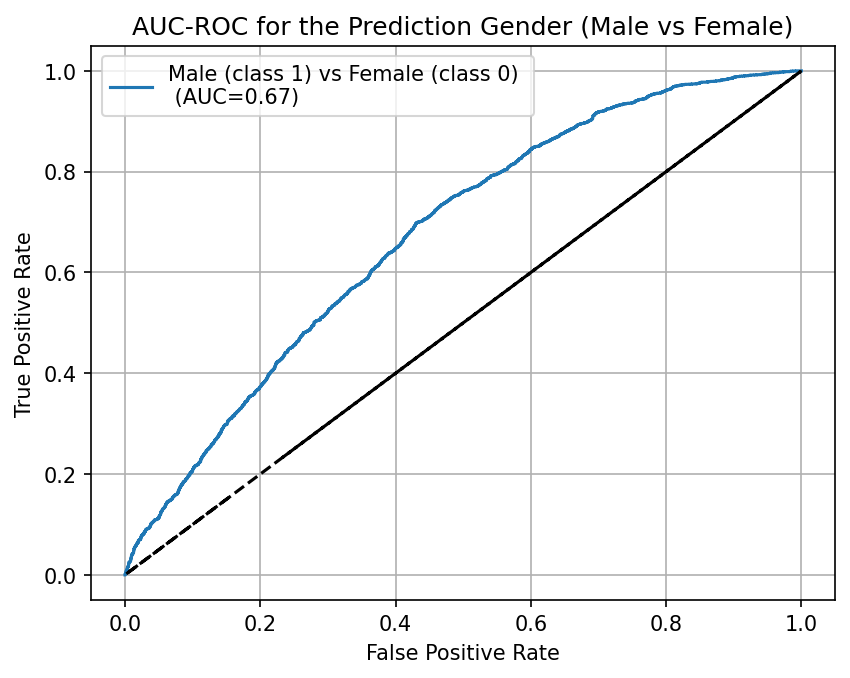

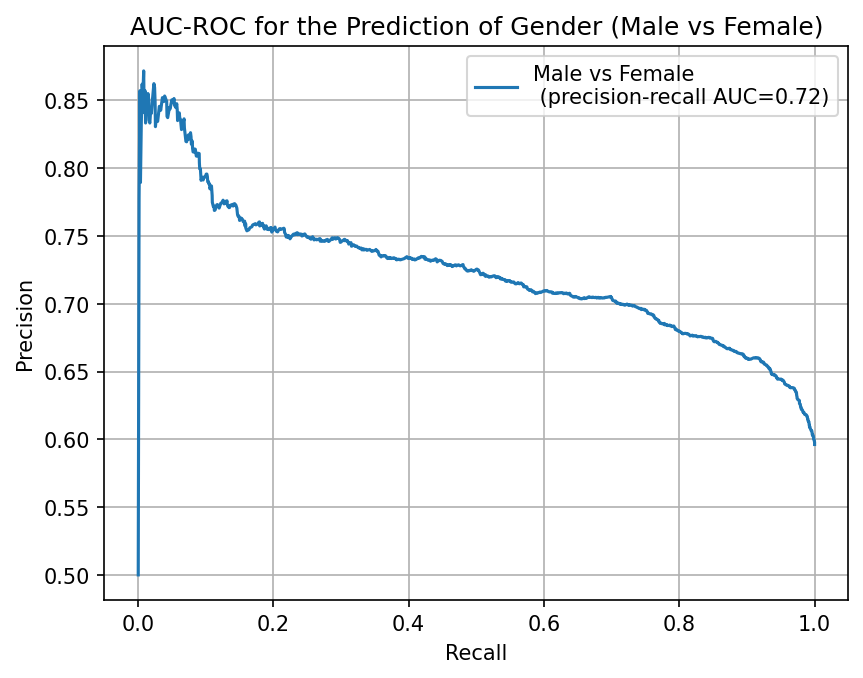

The optimum Threshold is: 0.63
              precision    recall  f1-score   support

           0       0.43      0.92      0.59      2691
           1       0.76      0.17      0.28      3973

    accuracy                           0.47      6664
   macro avg       0.59      0.55      0.43      6664
weighted avg       0.63      0.47      0.40      6664

[[2473  218]
 [3289  684]]


In [11]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 883us/step


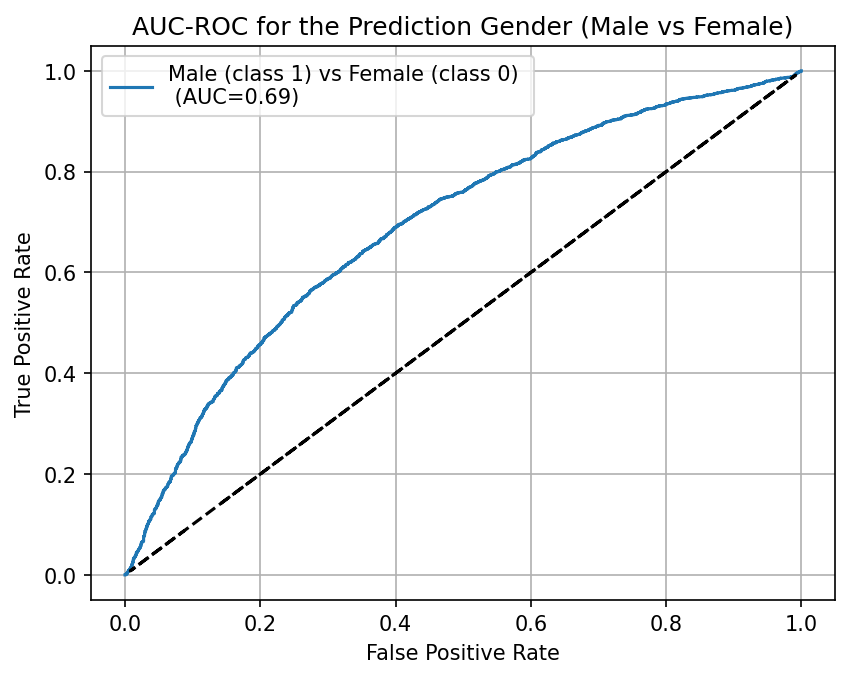

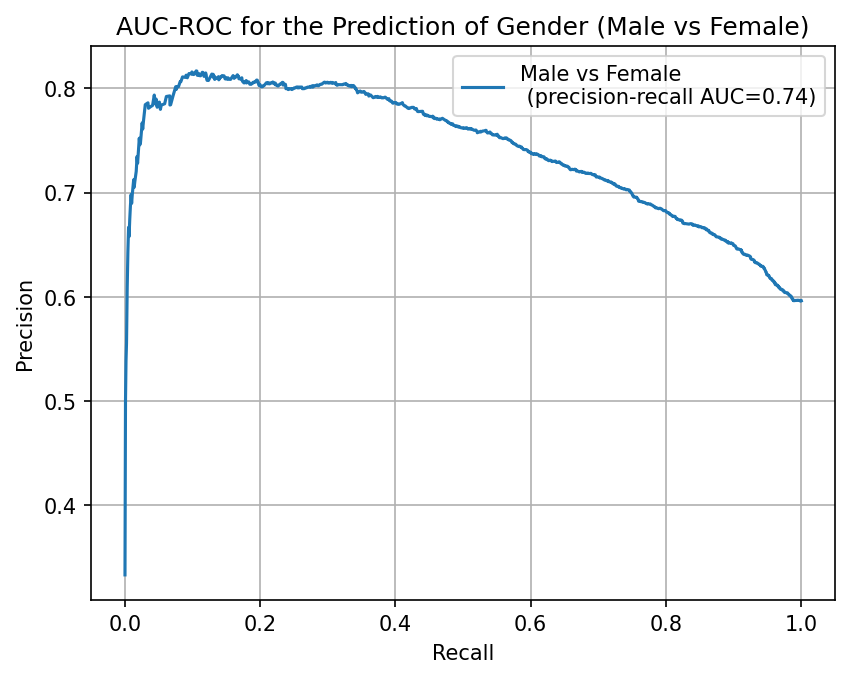

The optimum Threshold is: 0.65
              precision    recall  f1-score   support

           0       0.41      0.98      0.58      2691
           1       0.79      0.06      0.11      3973

    accuracy                           0.43      6664
   macro avg       0.60      0.52      0.35      6664
weighted avg       0.64      0.43      0.30      6664

[[2627   64]
 [3734  239]]


In [15]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 845us/step


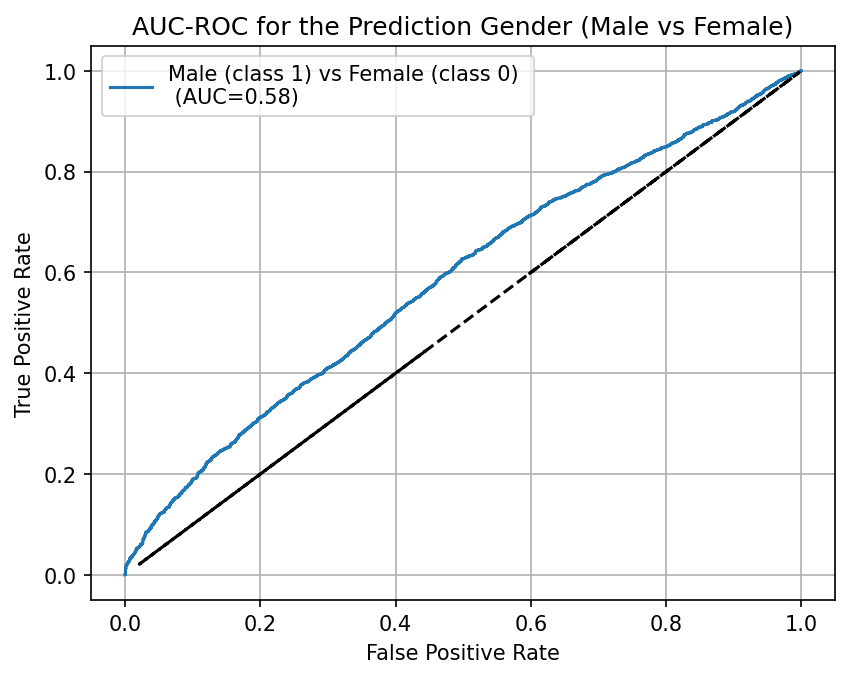

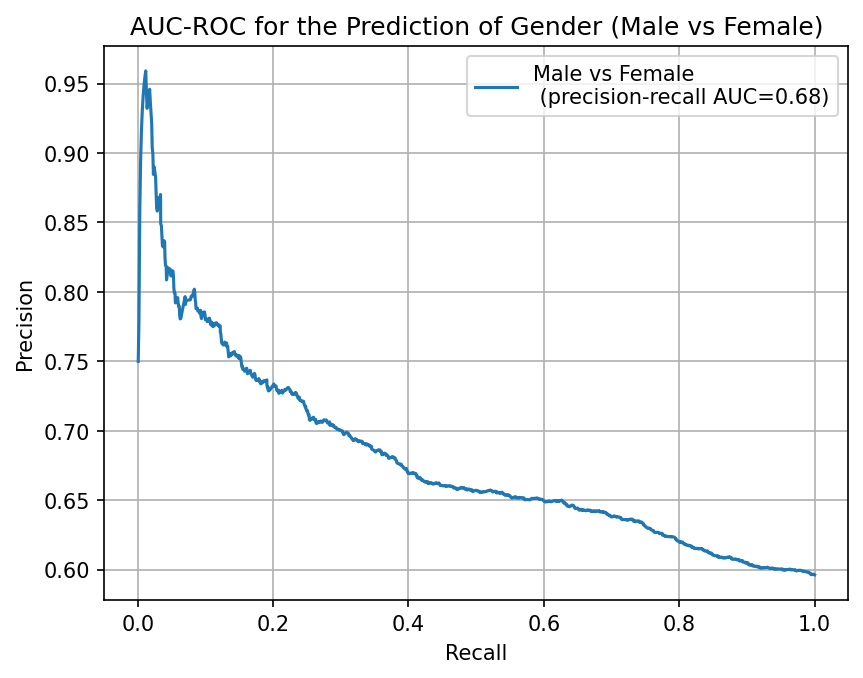

The optimum Threshold is: 0.56
              precision    recall  f1-score   support

           0       0.44      0.83      0.57      2691
           1       0.71      0.27      0.39      3973

    accuracy                           0.50      6664
   macro avg       0.57      0.55      0.48      6664
weighted avg       0.60      0.50      0.46      6664

[[2246  445]
 [2906 1067]]


In [16]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 1ms/step


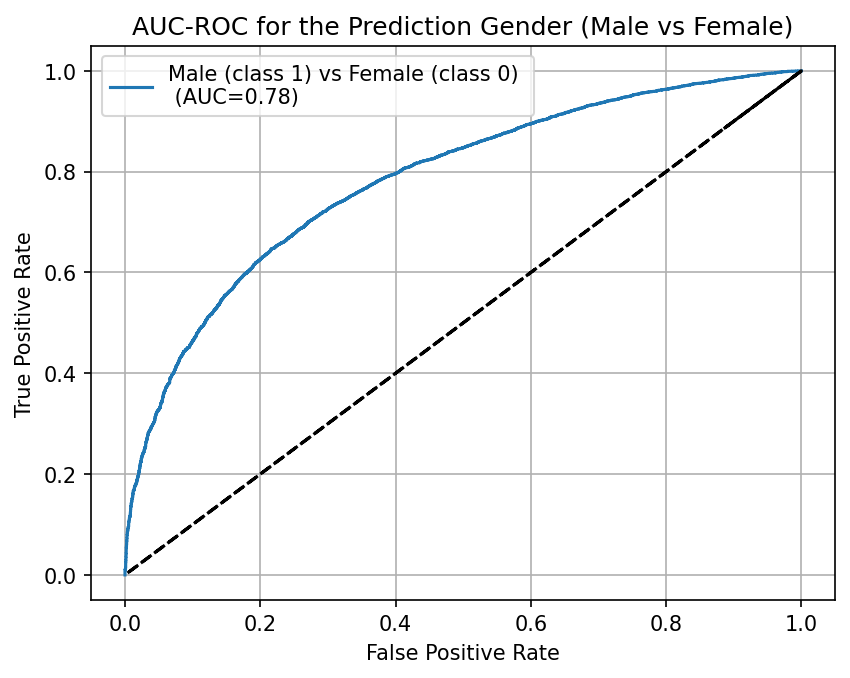

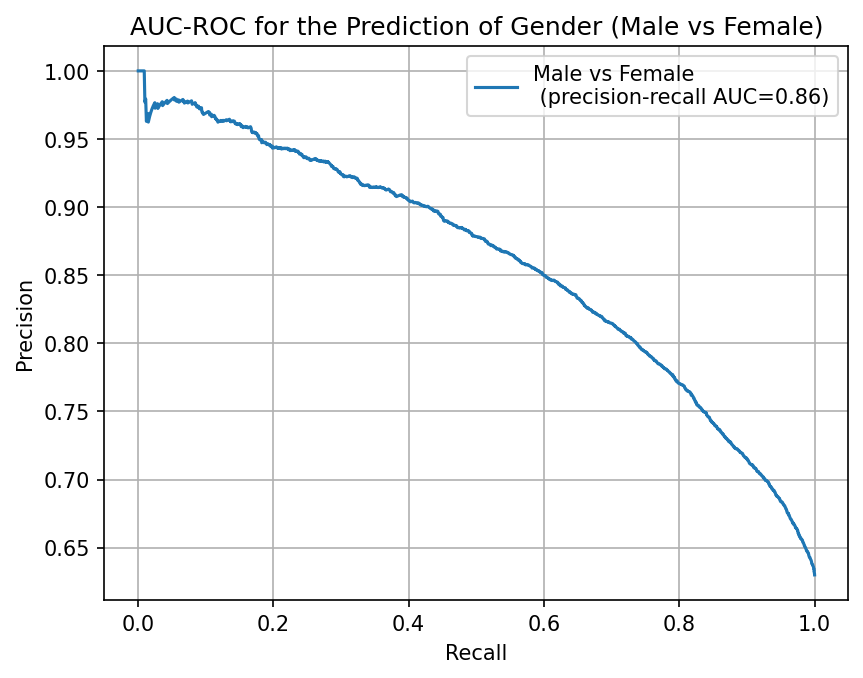

The optimum Threshold is: 0.71
              precision    recall  f1-score   support

         0.0       0.62      0.63      0.63      4961
         1.0       0.78      0.78      0.78      8448

    accuracy                           0.72     13409
   macro avg       0.70      0.70      0.70     13409
weighted avg       0.72      0.72      0.72     13409

[[3126 1835]
 [1877 6571]]


In [17]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 913us/step


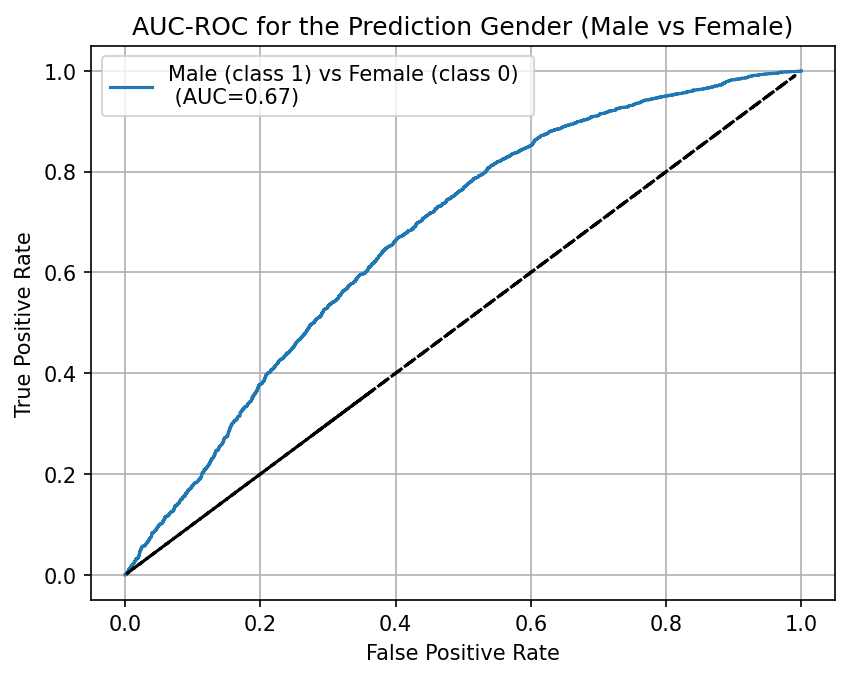

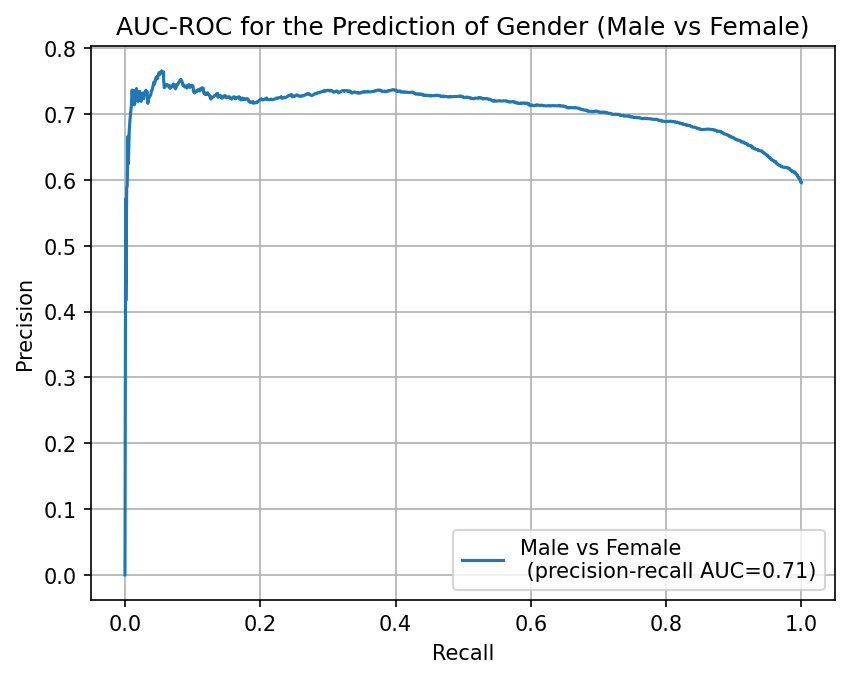

The optimum Threshold is: 0.63
              precision    recall  f1-score   support

           0       0.42      0.93      0.58      2691
           1       0.73      0.13      0.22      3973

    accuracy                           0.45      6664
   macro avg       0.57      0.53      0.40      6664
weighted avg       0.60      0.45      0.37      6664

[[2495  196]
 [3446  527]]


In [18]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 892us/step


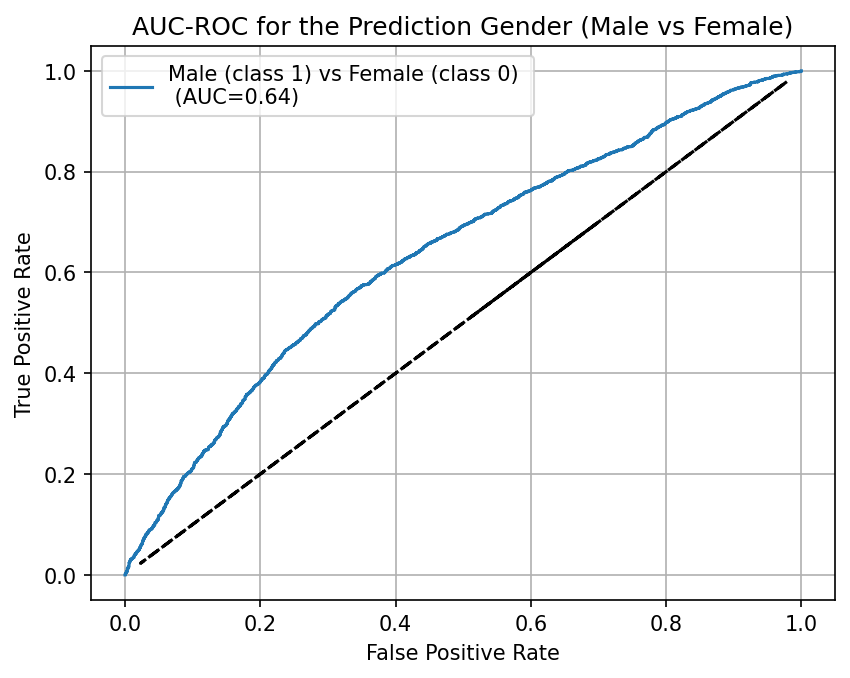

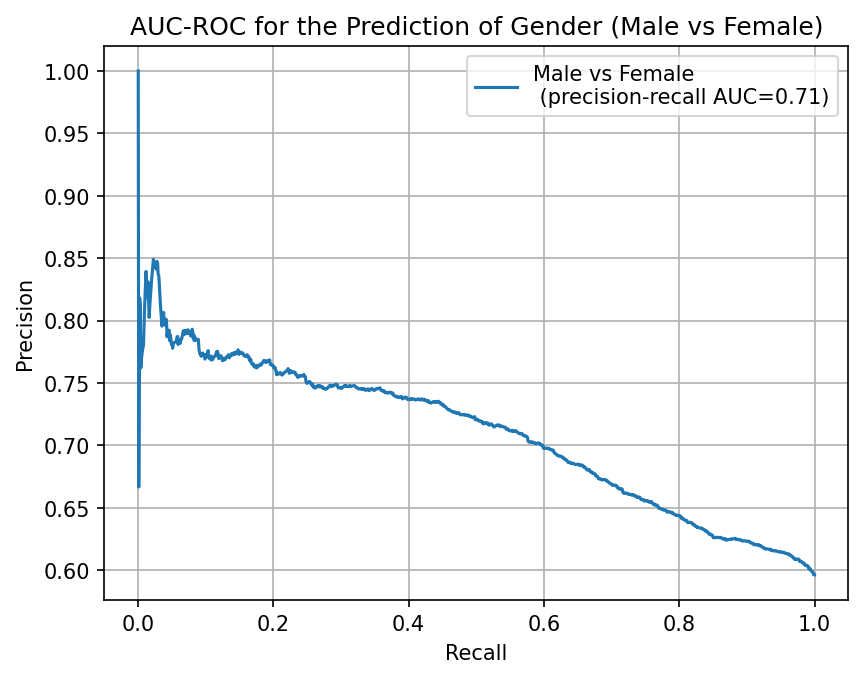

The optimum Threshold is: 0.61
              precision    recall  f1-score   support

           0       0.48      0.75      0.59      2691
           1       0.73      0.45      0.56      3973

    accuracy                           0.57      6664
   macro avg       0.61      0.60      0.57      6664
weighted avg       0.63      0.57      0.57      6664

[[2030  661]
 [2175 1798]]


In [19]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 875us/step


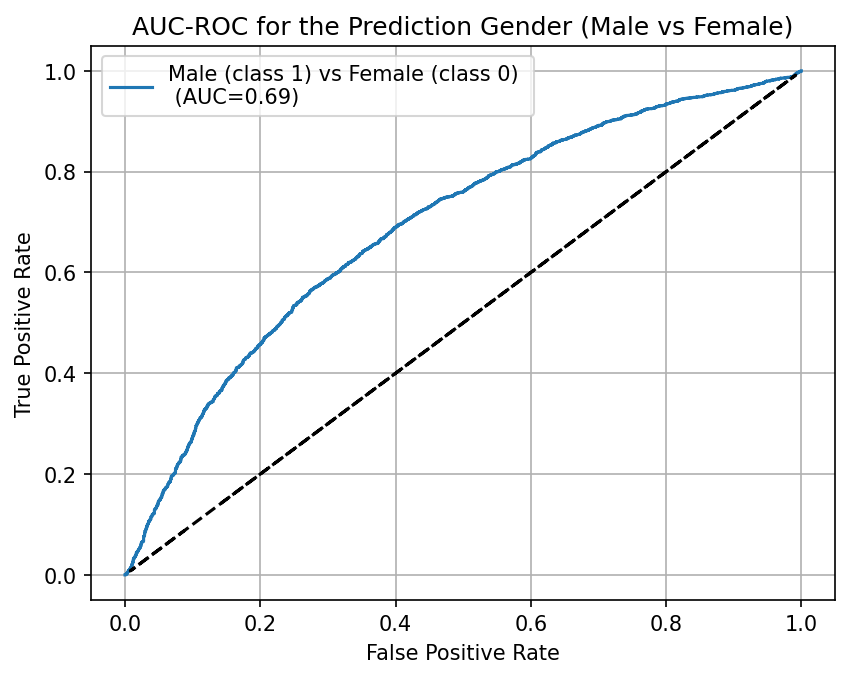

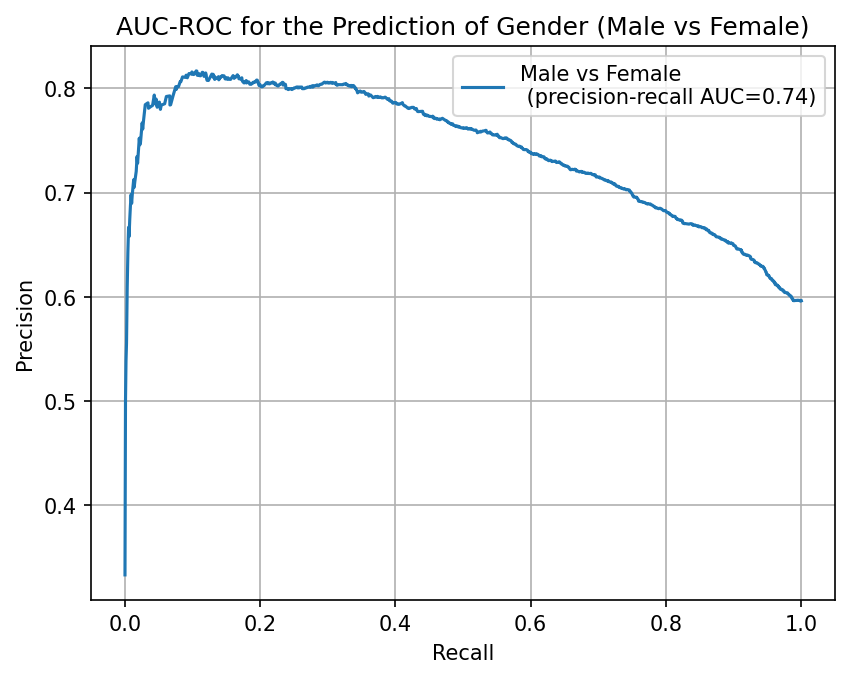

The optimum Threshold is: 0.65
              precision    recall  f1-score   support

           0       0.41      0.98      0.58      2691
           1       0.79      0.06      0.11      3973

    accuracy                           0.43      6664
   macro avg       0.60      0.52      0.35      6664
weighted avg       0.64      0.43      0.30      6664

[[2627   64]
 [3734  239]]


In [20]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 880us/step


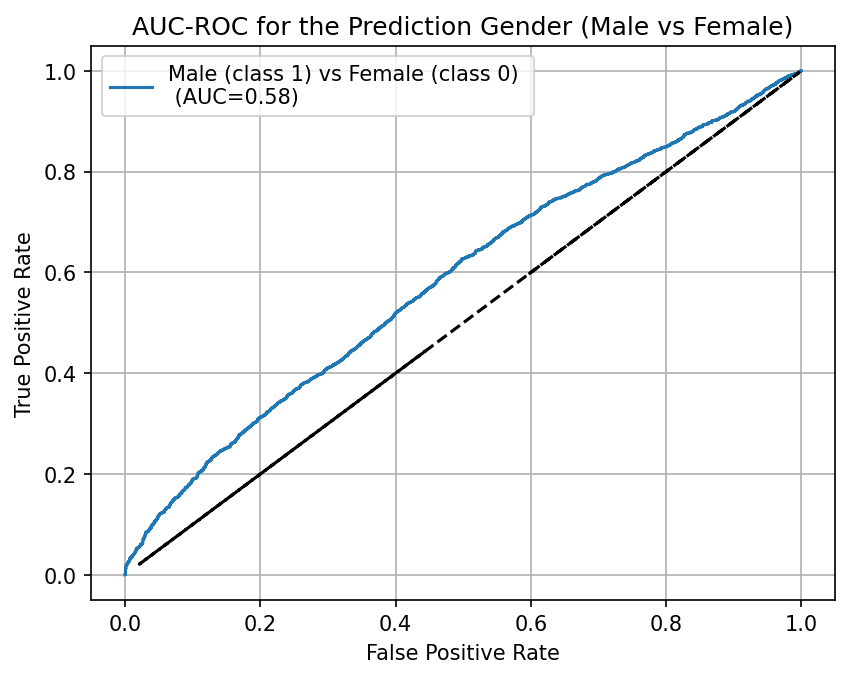

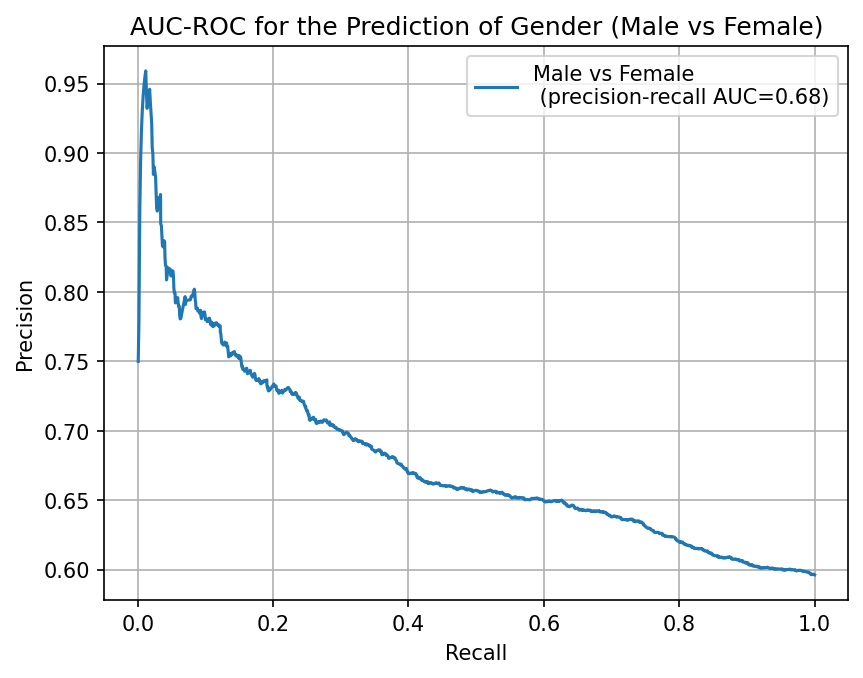

The optimum Threshold is: 0.56
              precision    recall  f1-score   support

           0       0.44      0.83      0.57      2691
           1       0.71      0.27      0.39      3973

    accuracy                           0.50      6664
   macro avg       0.57      0.55      0.48      6664
weighted avg       0.60      0.50      0.46      6664

[[2246  445]
 [2906 1067]]


In [21]:
# chexpert age ful model eevaluated by NIH
name = 'chexpert_sex_segment_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 1ms/step


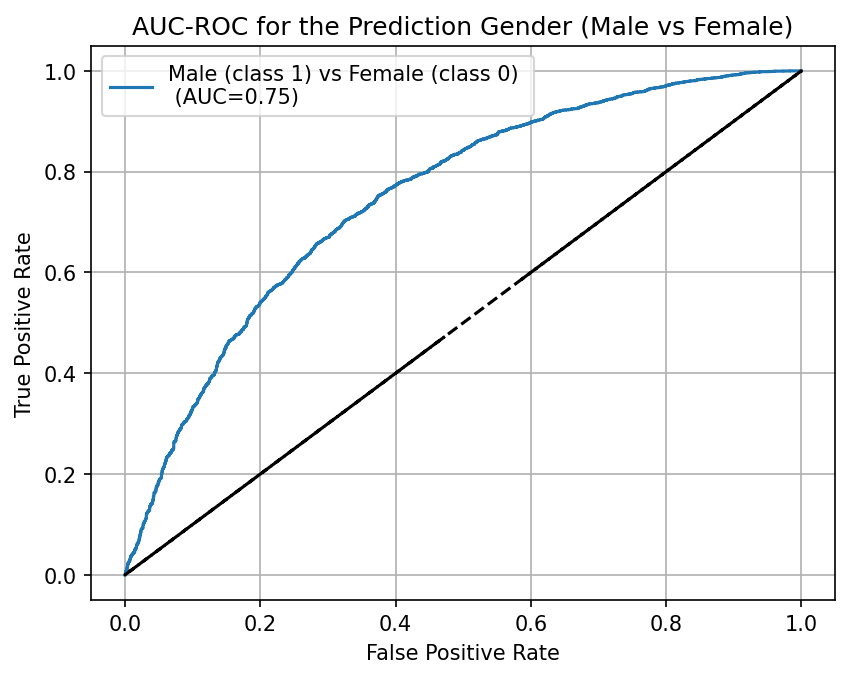

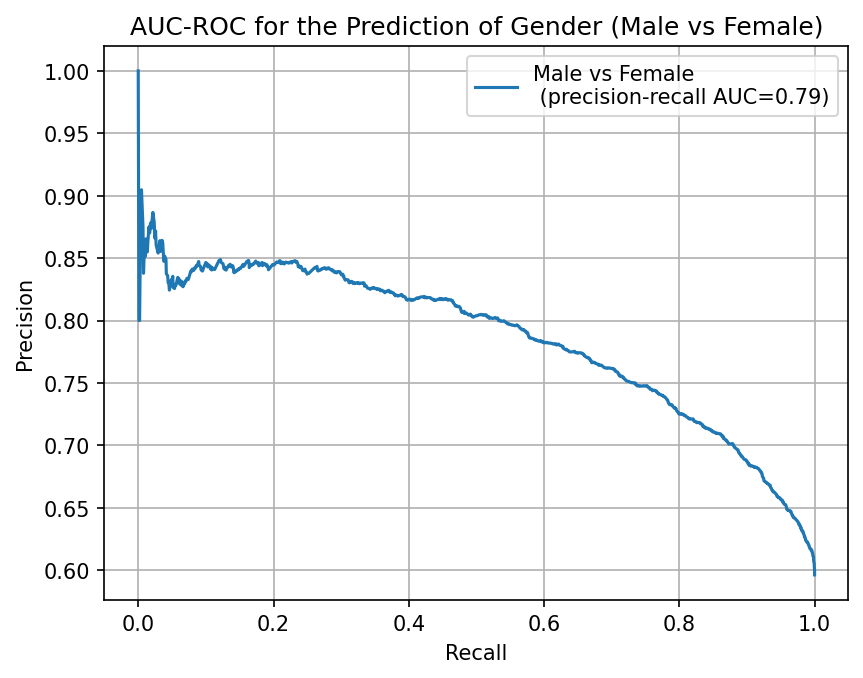

The optimum Threshold is: 0.69
              precision    recall  f1-score   support

           0       0.58      0.73      0.64      2691
           1       0.78      0.64      0.70      3973

    accuracy                           0.67      6664
   macro avg       0.68      0.68      0.67      6664
weighted avg       0.69      0.67      0.68      6664

[[1958  733]
 [1442 2531]]


In [22]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/nih_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 896us/step


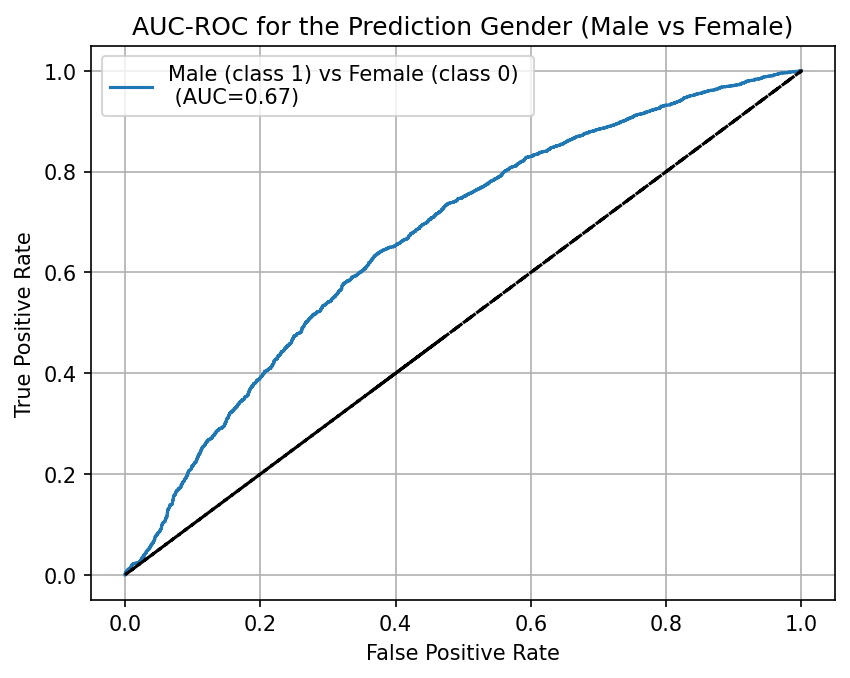

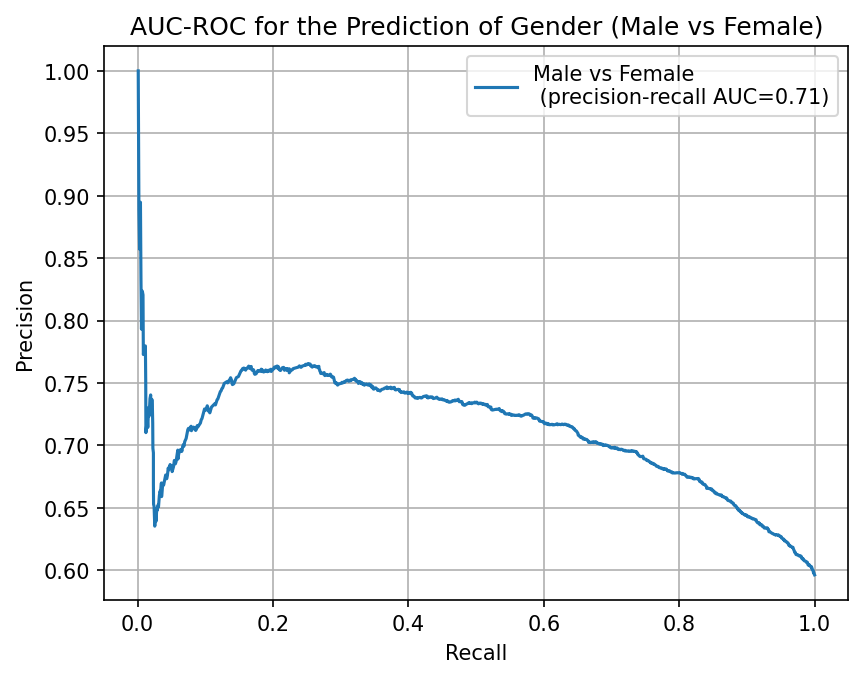

The optimum Threshold is: 0.63
              precision    recall  f1-score   support

           0       0.54      0.63      0.58      2691
           1       0.72      0.63      0.67      3973

    accuracy                           0.63      6664
   macro avg       0.63      0.63      0.63      6664
weighted avg       0.64      0.63      0.63      6664

[[1707  984]
 [1480 2493]]


In [26]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 830us/step


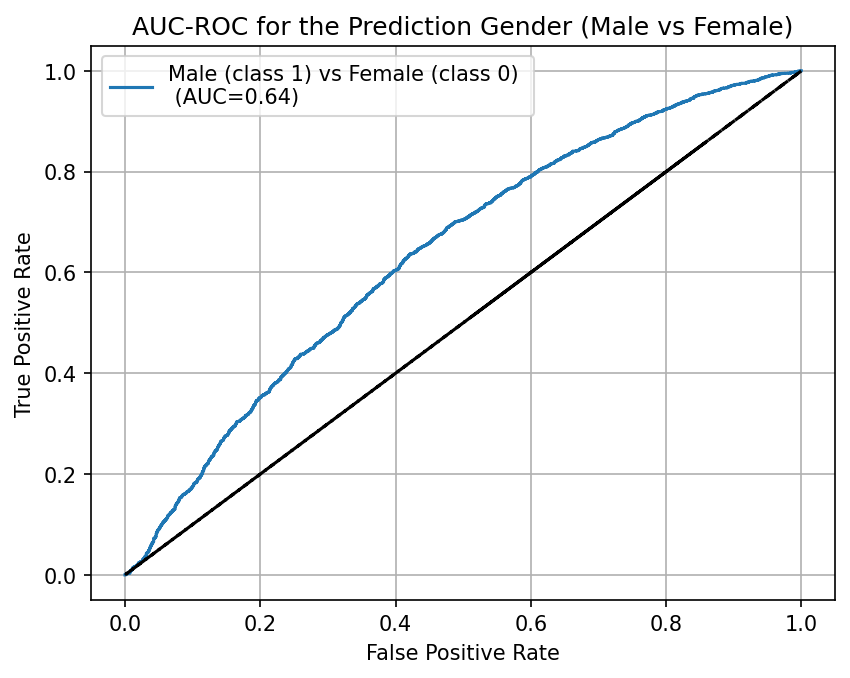

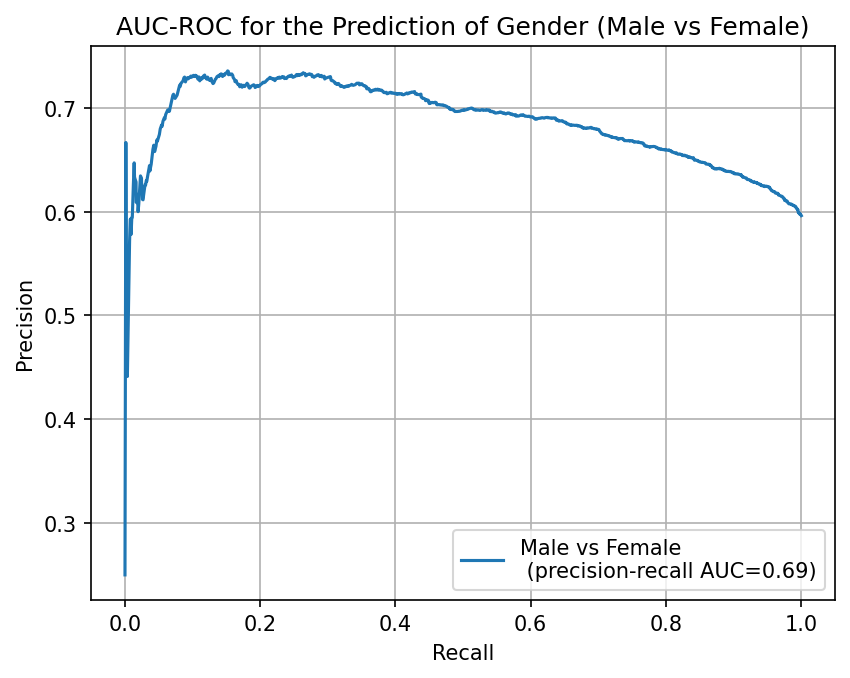

The optimum Threshold is: 0.61
              precision    recall  f1-score   support

           0       0.51      0.59      0.55      2691
           1       0.69      0.62      0.65      3973

    accuracy                           0.61      6664
   macro avg       0.60      0.60      0.60      6664
weighted avg       0.62      0.61      0.61      6664

[[1592 1099]
 [1522 2451]]


In [27]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 914us/step


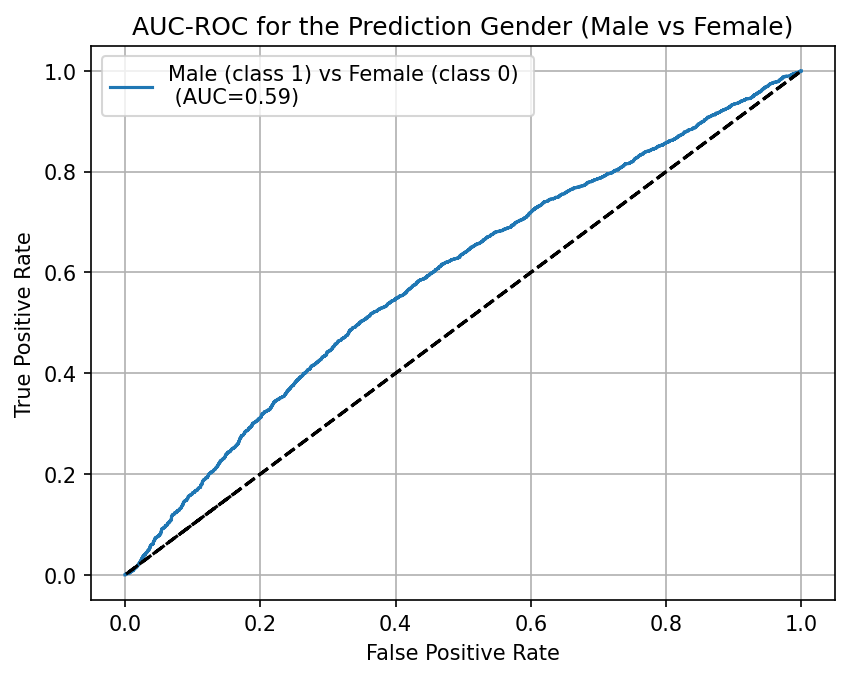

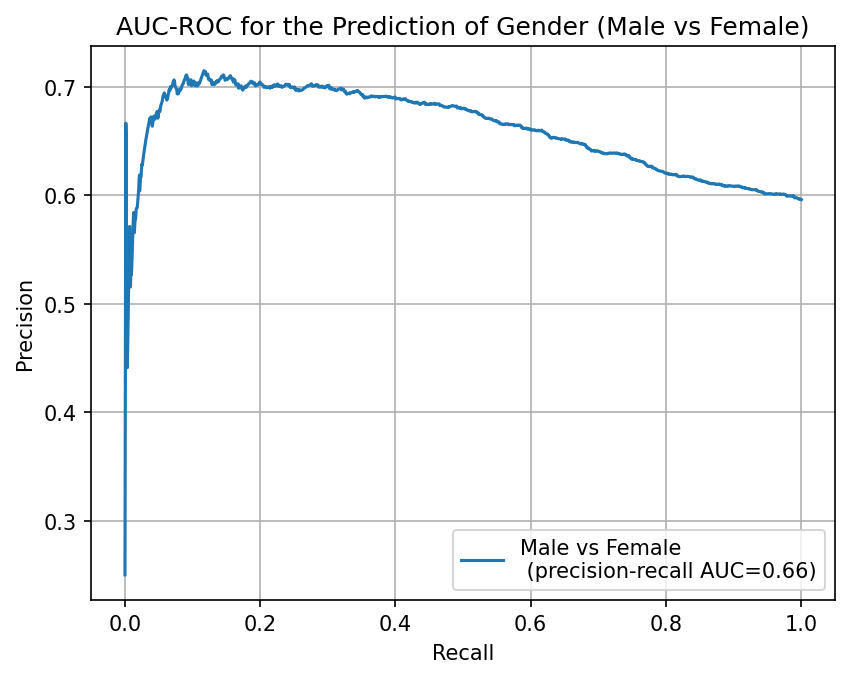

The optimum Threshold is: 0.57
              precision    recall  f1-score   support

           0       0.42      0.91      0.57      2691
           1       0.71      0.15      0.25      3973

    accuracy                           0.46      6664
   macro avg       0.56      0.53      0.41      6664
weighted avg       0.59      0.46      0.38      6664

[[2445  246]
 [3379  594]]


In [28]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

209/209 [==============================] - 0s 910us/step


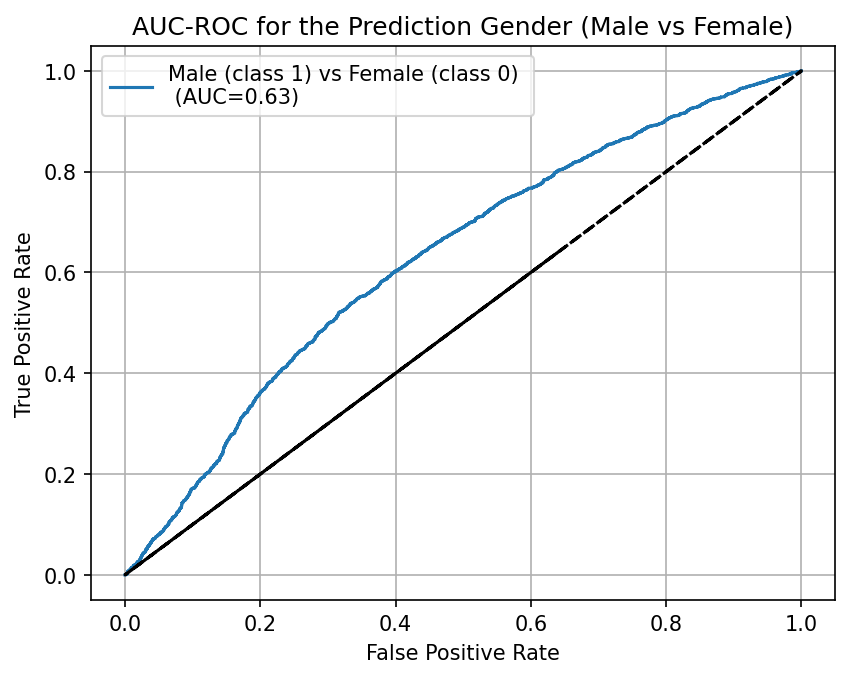

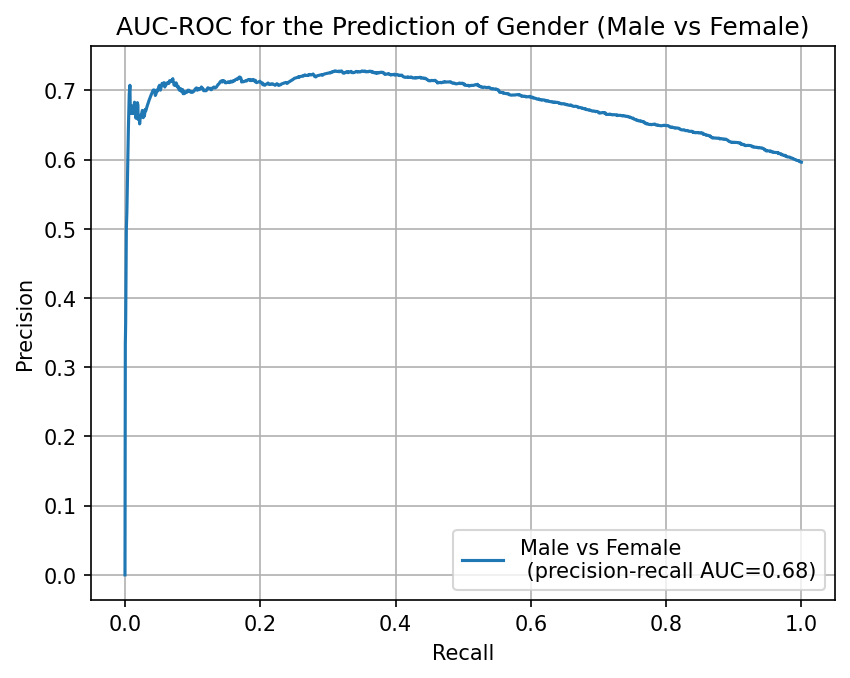

The optimum Threshold is: 0.60
              precision    recall  f1-score   support

           0       0.47      0.75      0.58      2691
           1       0.72      0.43      0.54      3973

    accuracy                           0.56      6664
   macro avg       0.59      0.59      0.56      6664
weighted avg       0.62      0.56      0.55      6664

[[2023  668]
 [2269 1704]]


In [29]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/NIH_sex_segments_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 1ms/step


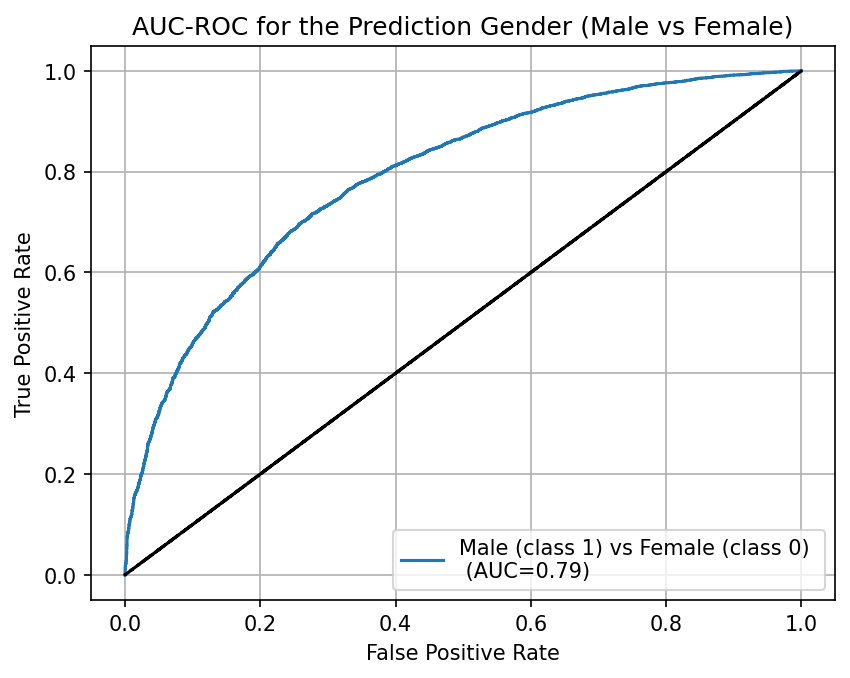

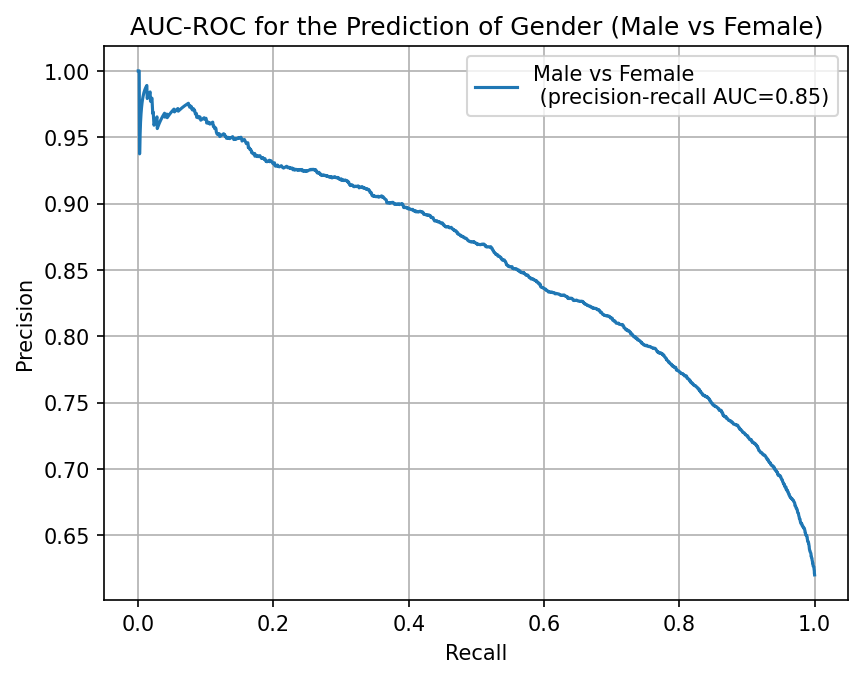

The optimum Threshold is: 0.72
              precision    recall  f1-score   support

         0.0       0.56      0.80      0.66      4287
         1.0       0.83      0.62      0.71      7000

    accuracy                           0.69     11287
   macro avg       0.70      0.71      0.68     11287
weighted avg       0.73      0.69      0.69     11287

[[3415  872]
 [2679 4321]]


In [30]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 836us/step


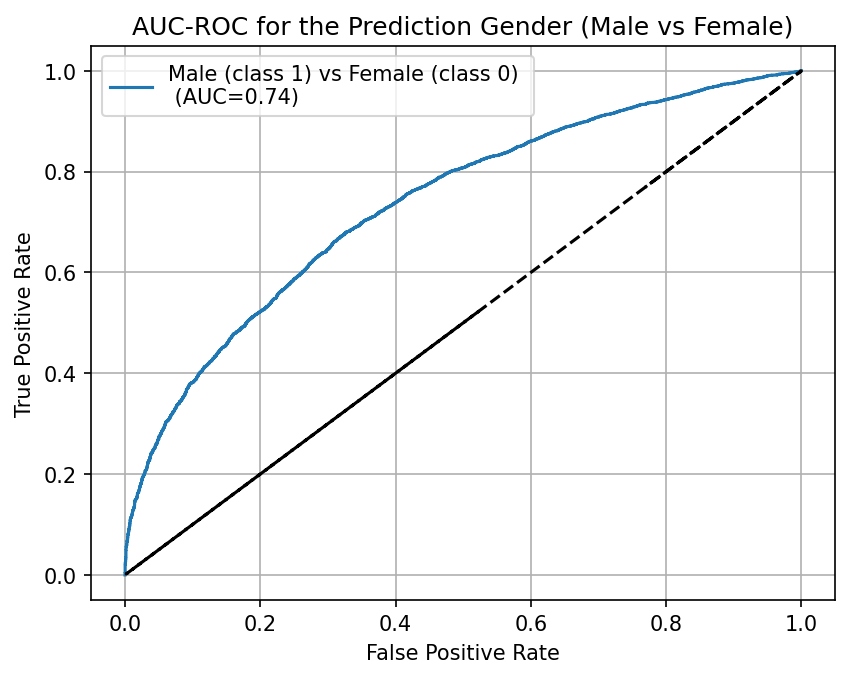

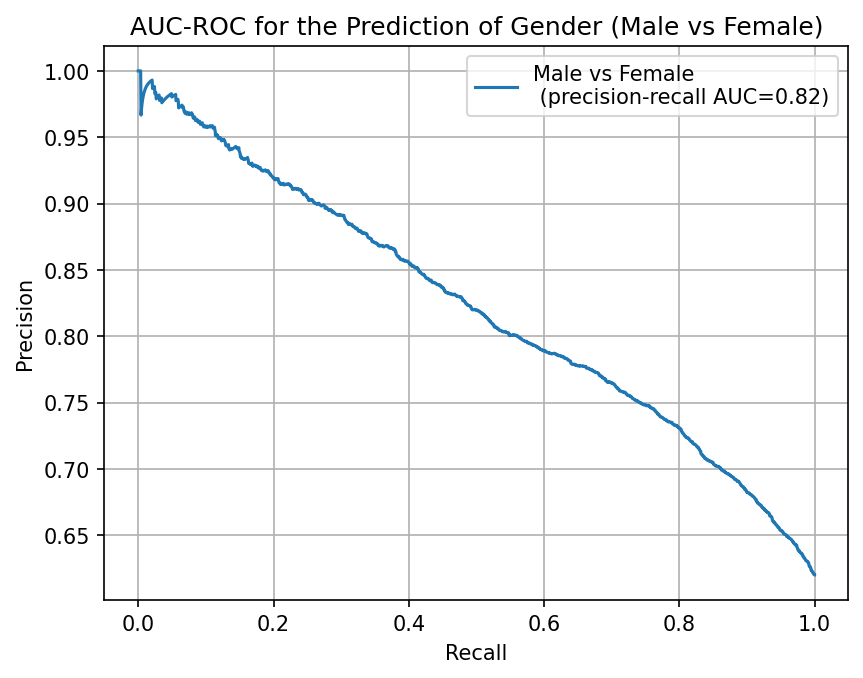

The optimum Threshold is: 0.68
              precision    recall  f1-score   support

         0.0       0.53      0.73      0.62      4287
         1.0       0.79      0.61      0.69      7000

    accuracy                           0.66     11287
   macro avg       0.66      0.67      0.65     11287
weighted avg       0.69      0.66      0.66     11287

[[3136 1151]
 [2738 4262]]


In [32]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 889us/step


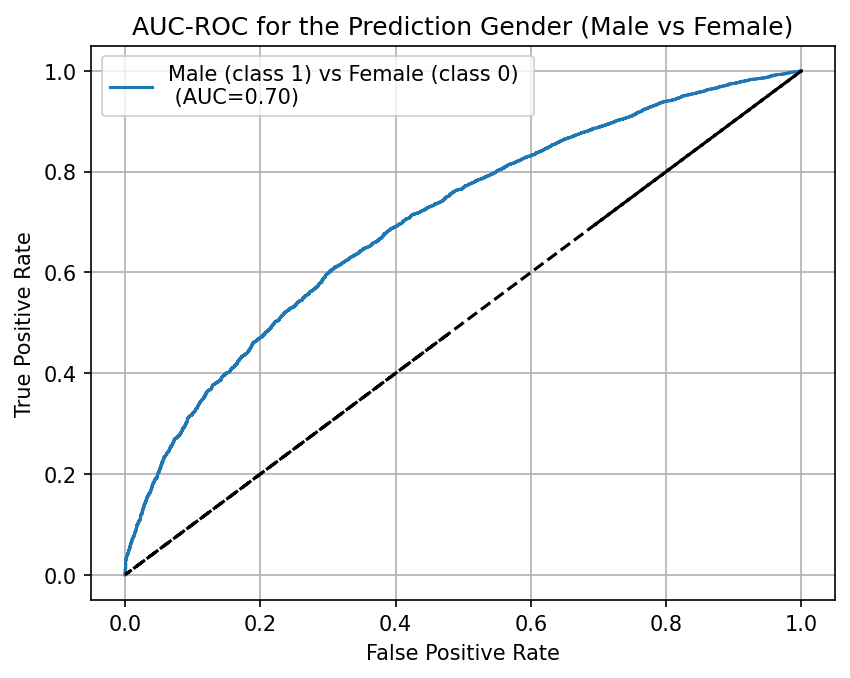

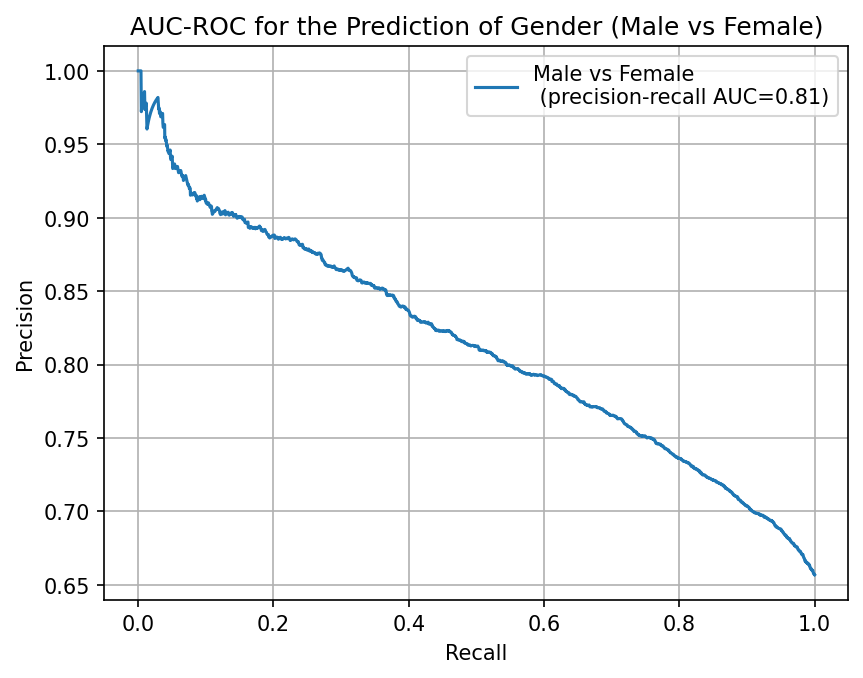

The optimum Threshold is: 0.65
              precision    recall  f1-score   support

         0.0       0.46      0.76      0.57      3873
         1.0       0.81      0.53      0.64      7411

    accuracy                           0.61     11284
   macro avg       0.63      0.64      0.60     11284
weighted avg       0.69      0.61      0.61     11284

[[2933  940]
 [3507 3904]]


In [33]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 862us/step


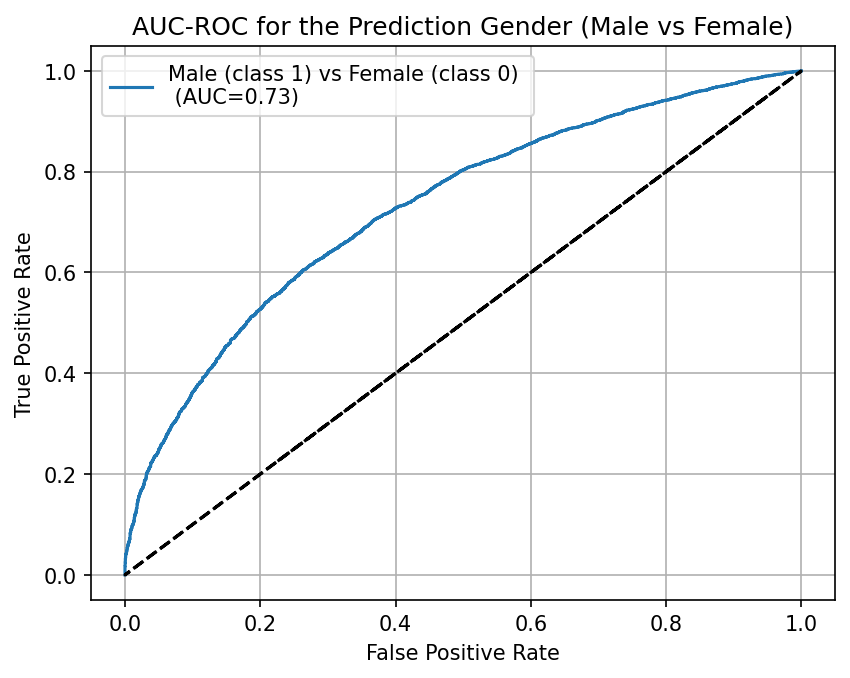

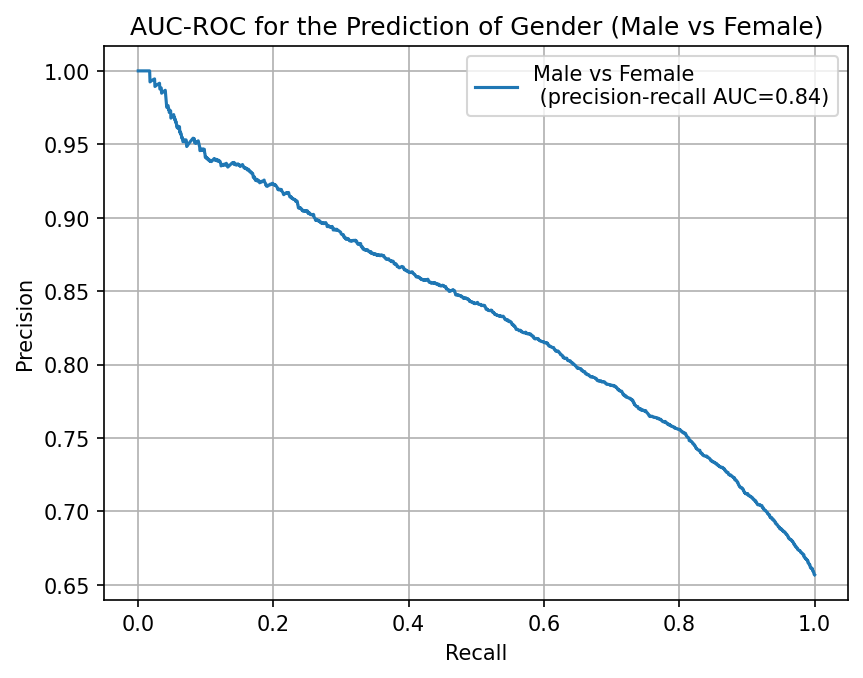

The optimum Threshold is: 0.67
              precision    recall  f1-score   support

         0.0       0.48      0.76      0.59      3873
         1.0       0.82      0.58      0.68      7411

    accuracy                           0.64     11284
   macro avg       0.65      0.67      0.64     11284
weighted avg       0.71      0.64      0.65     11284

[[2937  936]
 [3119 4292]]


In [34]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 990us/step


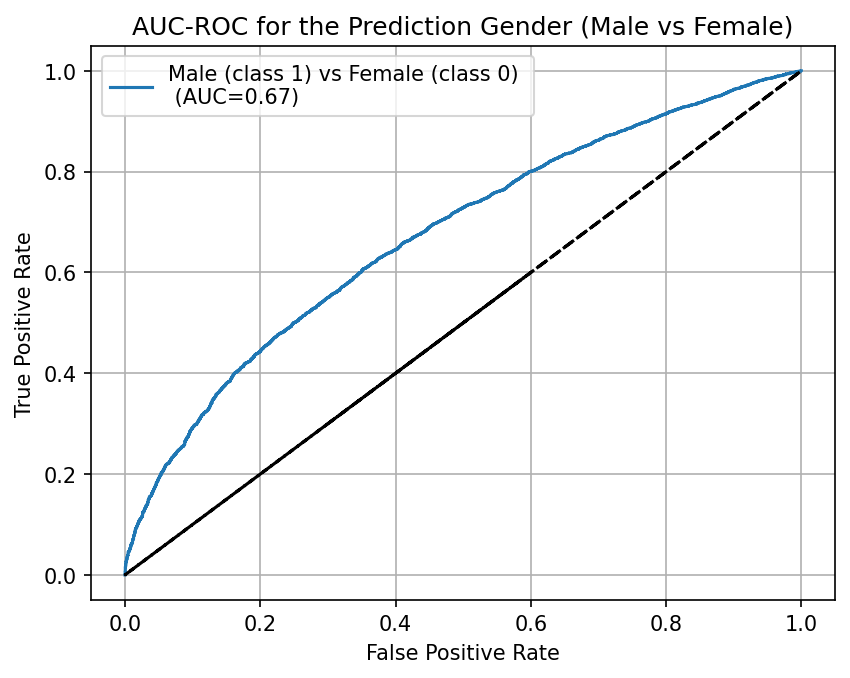

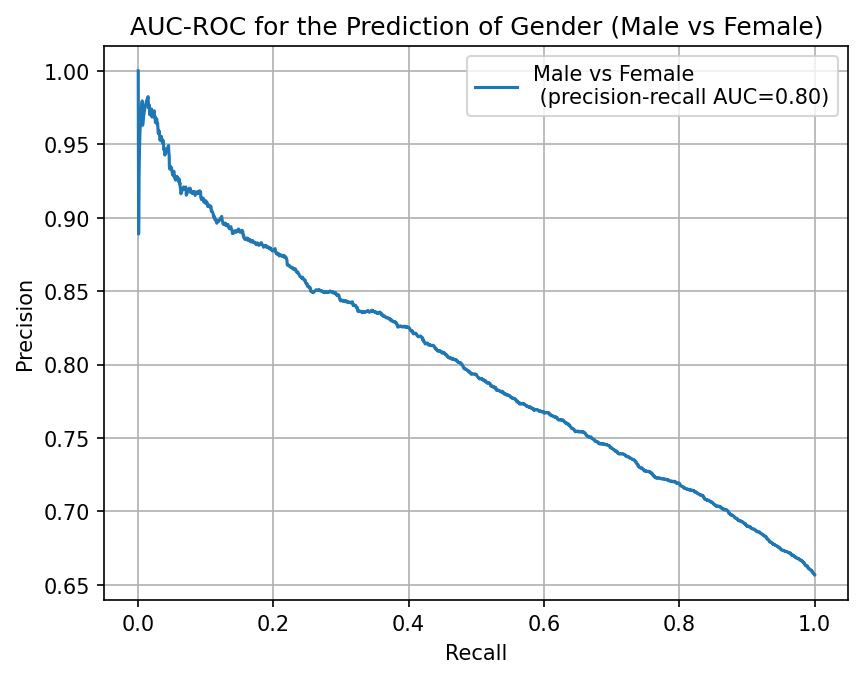

The optimum Threshold is: 0.63
              precision    recall  f1-score   support

         0.0       0.44      0.75      0.55      3873
         1.0       0.79      0.49      0.61      7411

    accuracy                           0.58     11284
   macro avg       0.62      0.62      0.58     11284
weighted avg       0.67      0.58      0.59     11284

[[2924  949]
 [3762 3649]]


In [35]:
# chexpert age ful model eevaluated by NIH
name = 'mimic_sex_segments_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 1ms/step


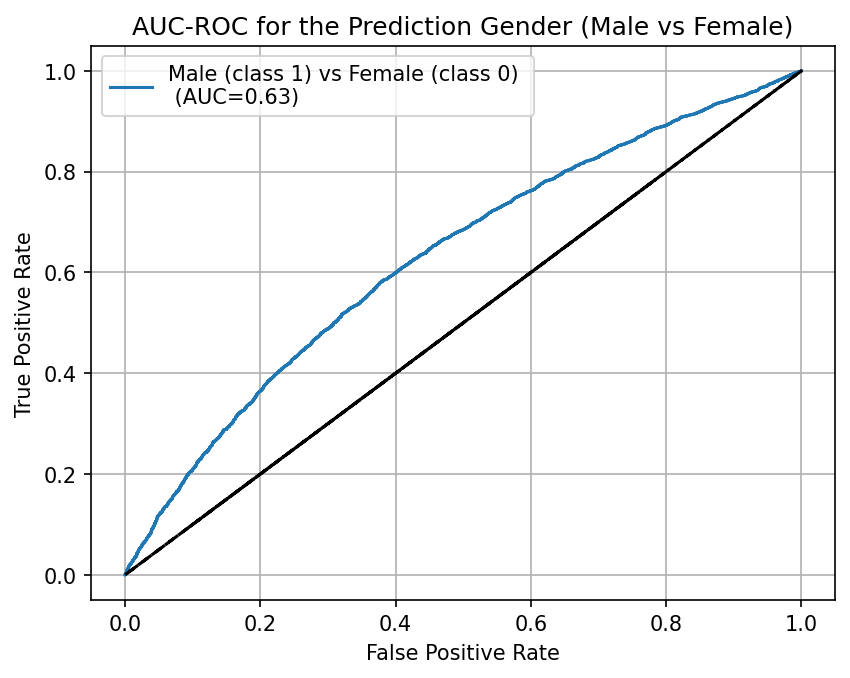

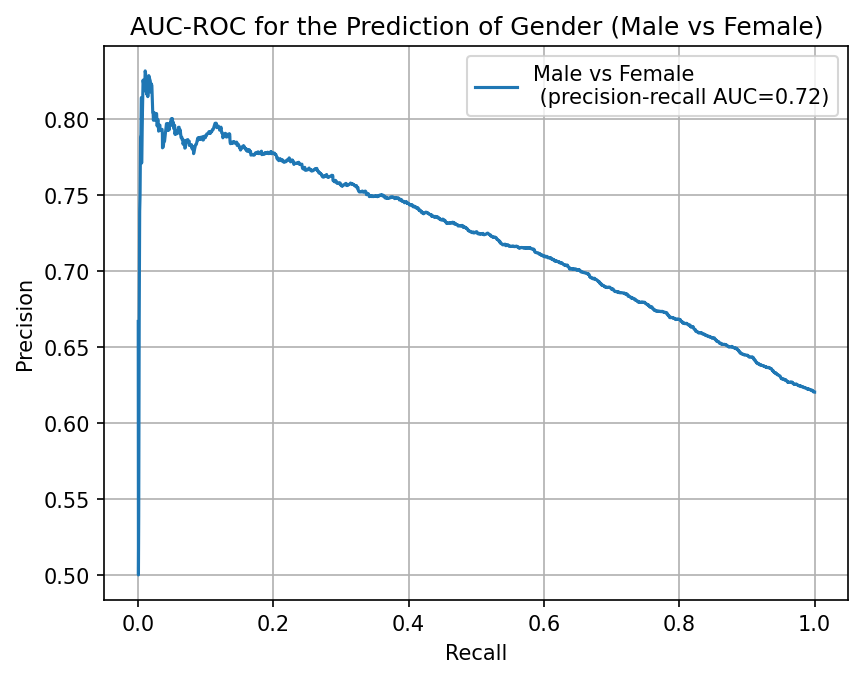

The optimum Threshold is: 0.60
              precision    recall  f1-score   support

         0.0       0.43      0.83      0.56      4287
         1.0       0.75      0.32      0.45      7000

    accuracy                           0.52     11287
   macro avg       0.59      0.58      0.51     11287
weighted avg       0.63      0.52      0.50     11287

[[3548  739]
 [4729 2271]]


In [36]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 894us/step


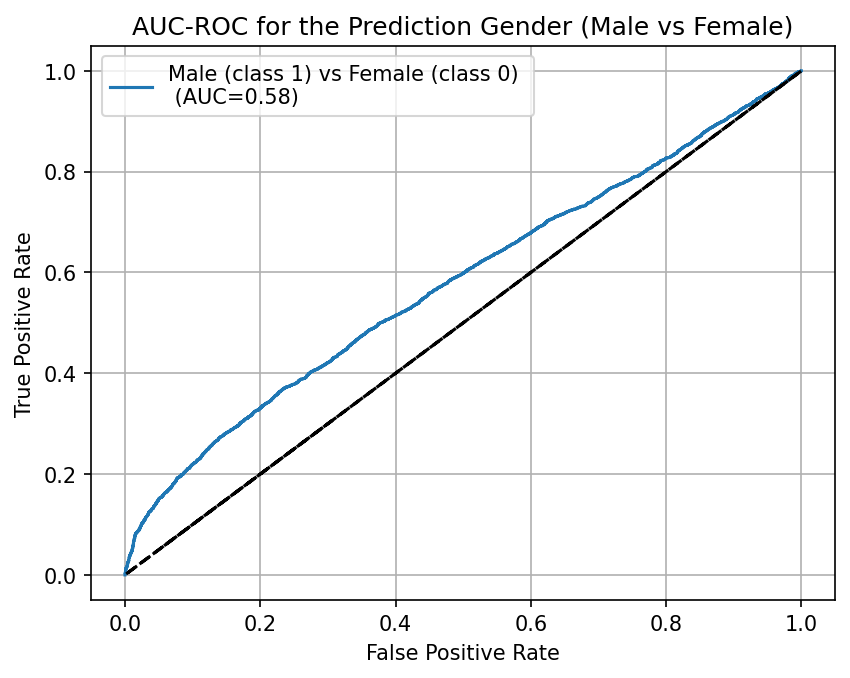

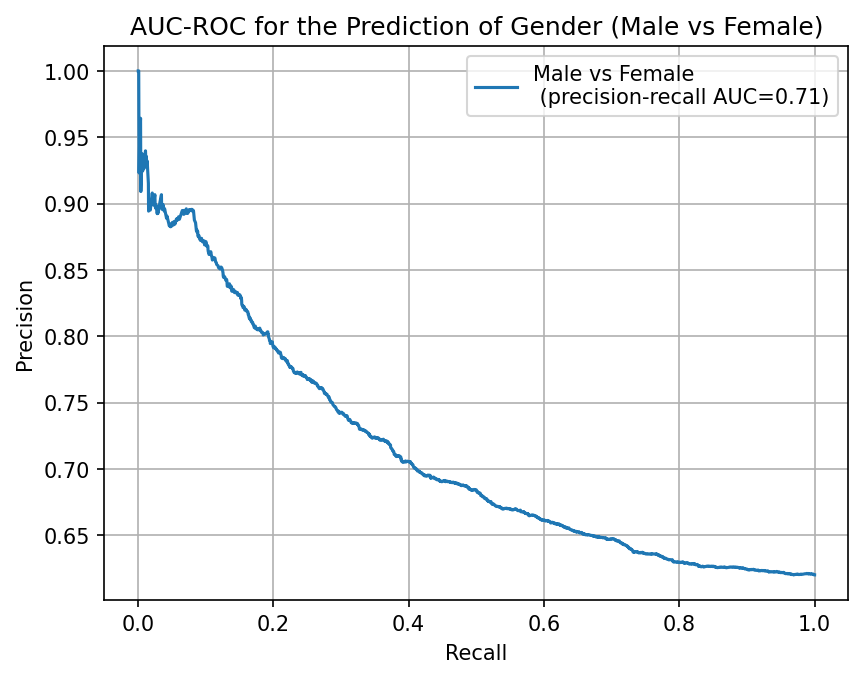

The optimum Threshold is: 0.56
              precision    recall  f1-score   support

         0.0       0.41      0.92      0.57      4287
         1.0       0.80      0.19      0.31      7000

    accuracy                           0.47     11287
   macro avg       0.61      0.56      0.44     11287
weighted avg       0.65      0.47      0.41     11287

[[3956  331]
 [5656 1344]]


In [38]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 871us/step


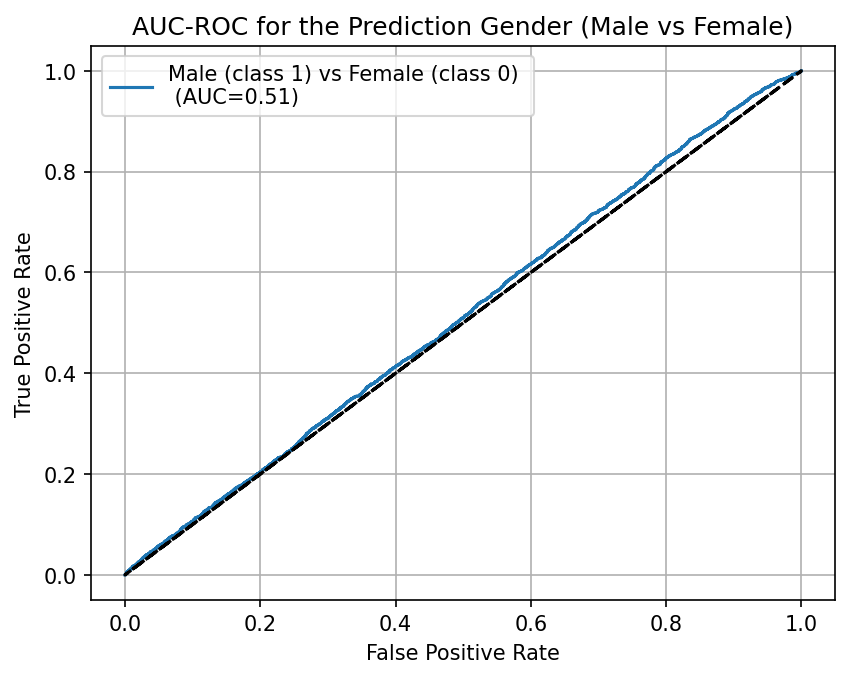

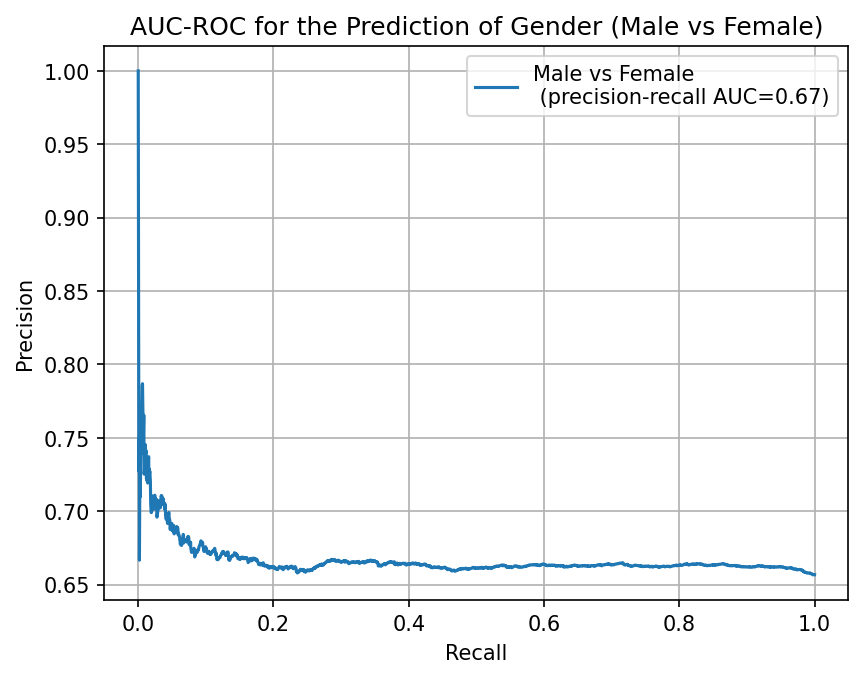

The optimum Threshold is: 0.51
              precision    recall  f1-score   support

         0.0       0.34      0.92      0.50      3873
         1.0       0.67      0.09      0.15      7411

    accuracy                           0.37     11284
   macro avg       0.51      0.50      0.33     11284
weighted avg       0.56      0.37      0.27     11284

[[3560  313]
 [6766  645]]


In [39]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 1ms/step


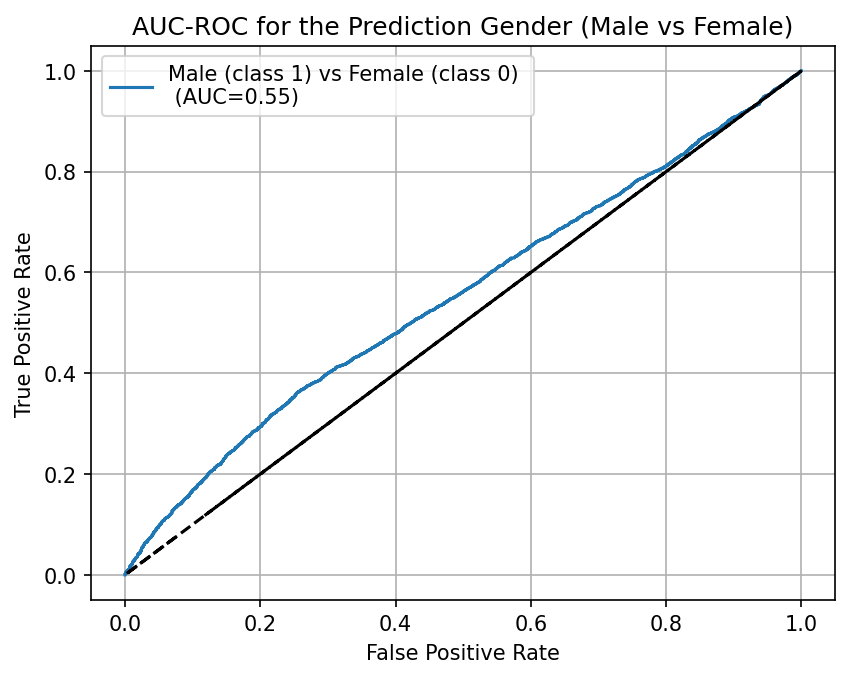

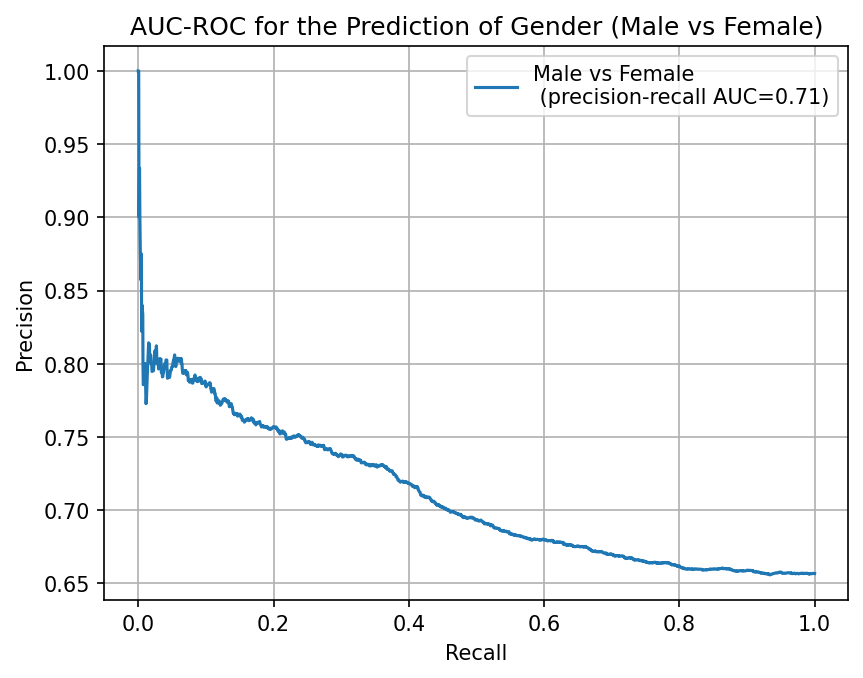

The optimum Threshold is: 0.54
              precision    recall  f1-score   support

         0.0       0.38      0.67      0.48      3873
         1.0       0.71      0.42      0.53      7411

    accuracy                           0.51     11284
   macro avg       0.54      0.55      0.51     11284
weighted avg       0.60      0.51      0.51     11284

[[2597 1276]
 [4285 3126]]


In [40]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

353/353 [==============================] - 0s 835us/step


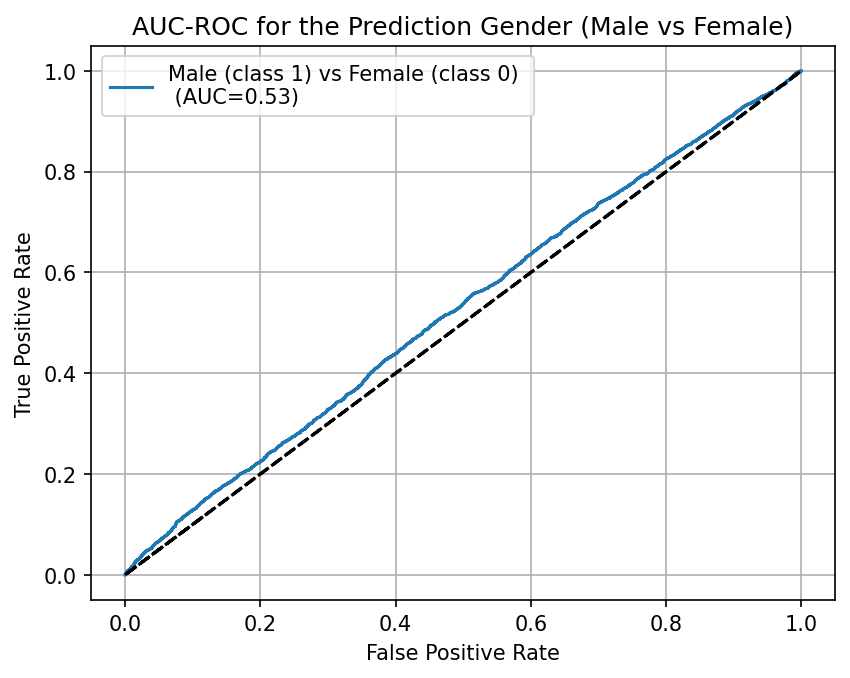

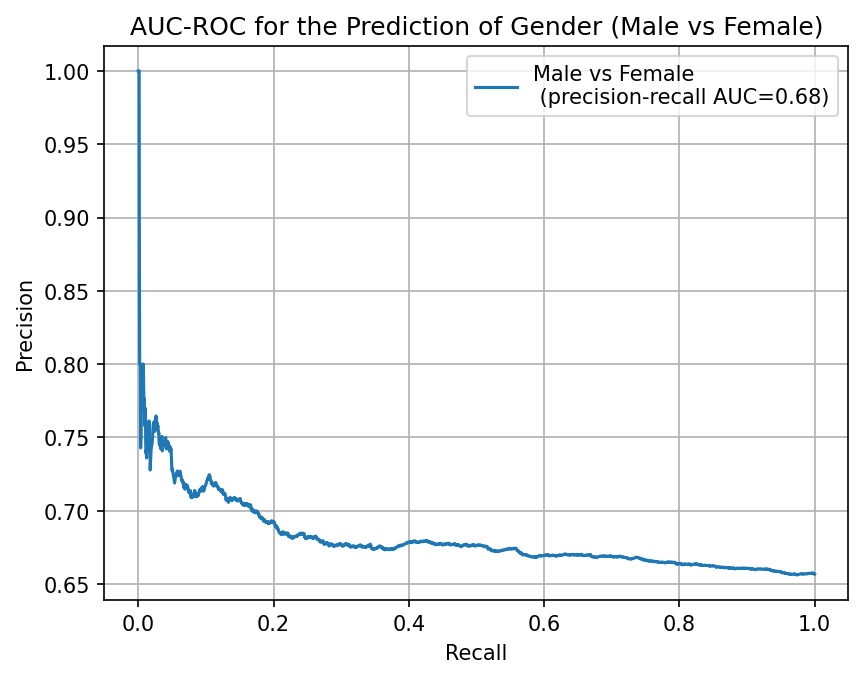

The optimum Threshold is: 0.52
              precision    recall  f1-score   support

         0.0       0.35      0.85      0.50      3873
         1.0       0.70      0.18      0.29      7411

    accuracy                           0.41     11284
   macro avg       0.52      0.51      0.39     11284
weighted avg       0.58      0.41      0.36     11284

[[3283  590]
 [6066 1345]]


In [41]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/chexpert_sex_segment_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 1ms/step


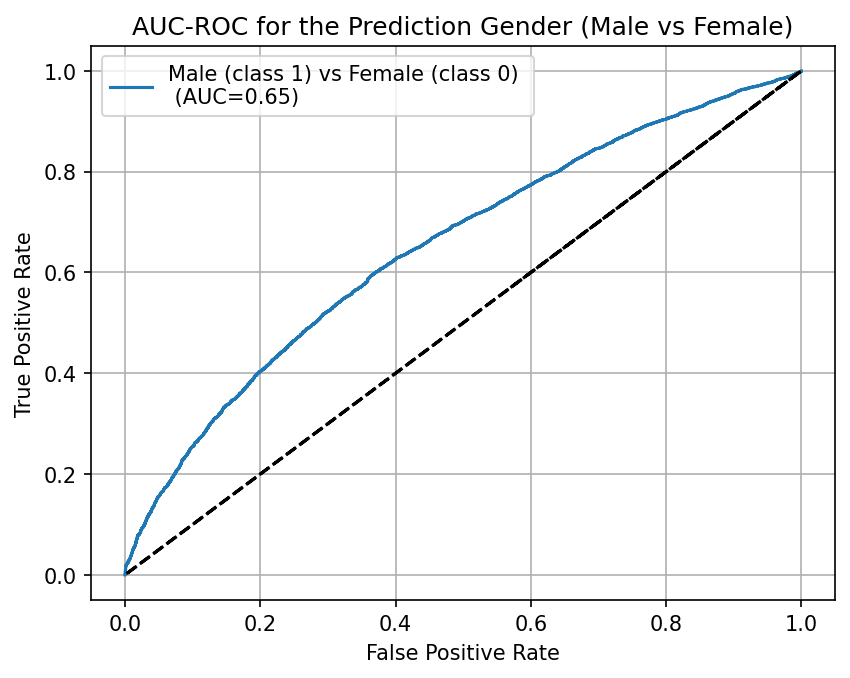

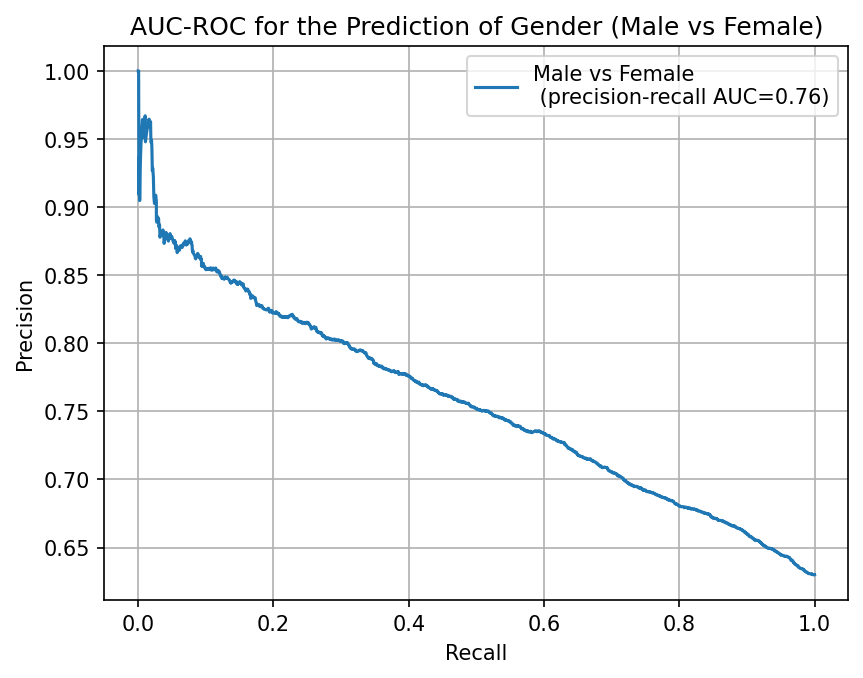

The optimum Threshold is: 0.61
              precision    recall  f1-score   support

         0.0       0.46      0.73      0.56      4961
         1.0       0.76      0.48      0.59      8448

    accuracy                           0.58     13409
   macro avg       0.61      0.61      0.58     13409
weighted avg       0.64      0.58      0.58     13409

[[3641 1320]
 [4356 4092]]


In [42]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_full_'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_full_belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 837us/step


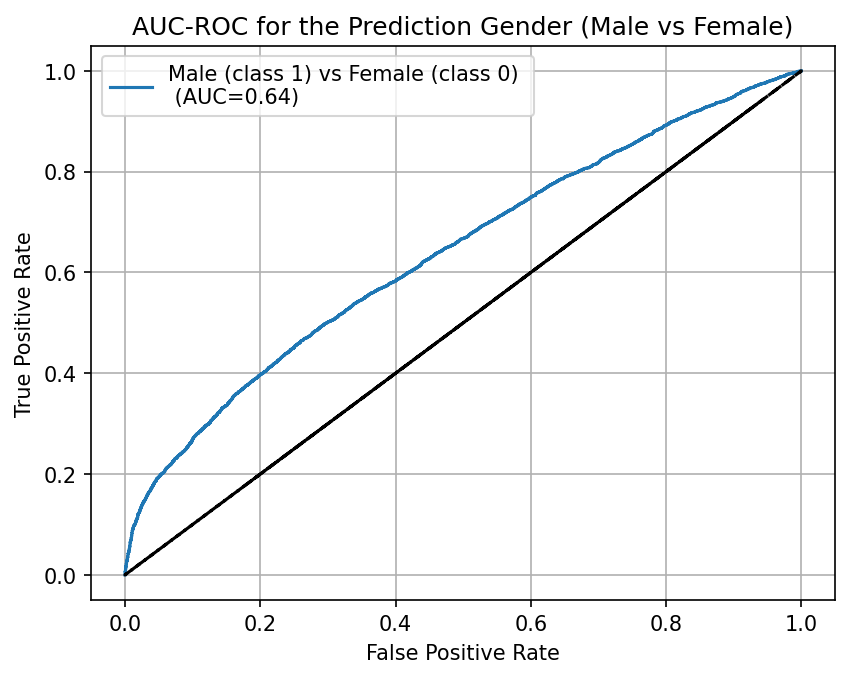

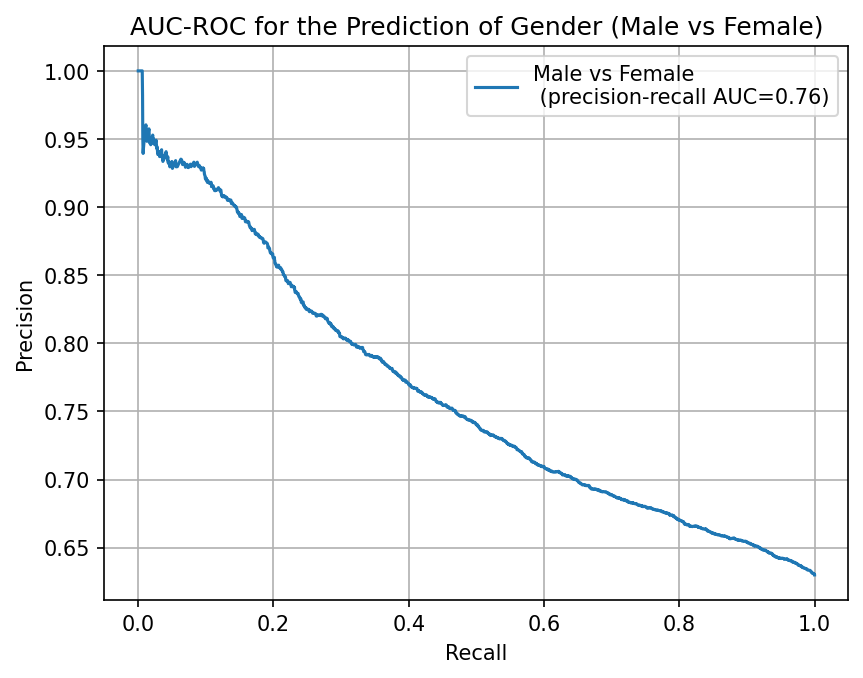

The optimum Threshold is: 0.60
              precision    recall  f1-score   support

         0.0       0.41      0.92      0.57      4961
         1.0       0.83      0.24      0.37      8448

    accuracy                           0.49     13409
   macro avg       0.62      0.58      0.47     13409
weighted avg       0.68      0.49      0.44     13409

[[4561  400]
 [6437 2011]]


In [44]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_0__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_segments_segment_0__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 979us/step


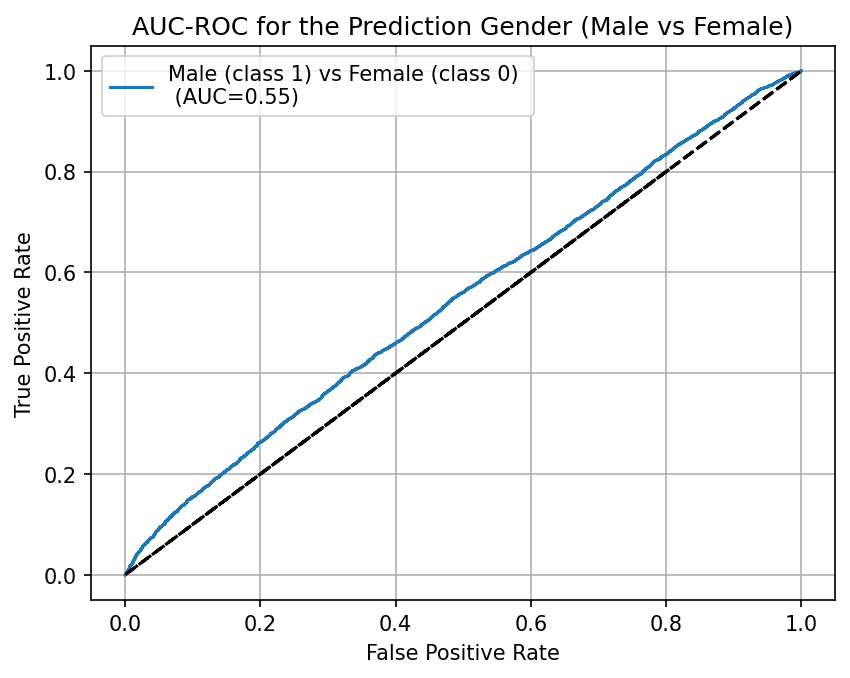

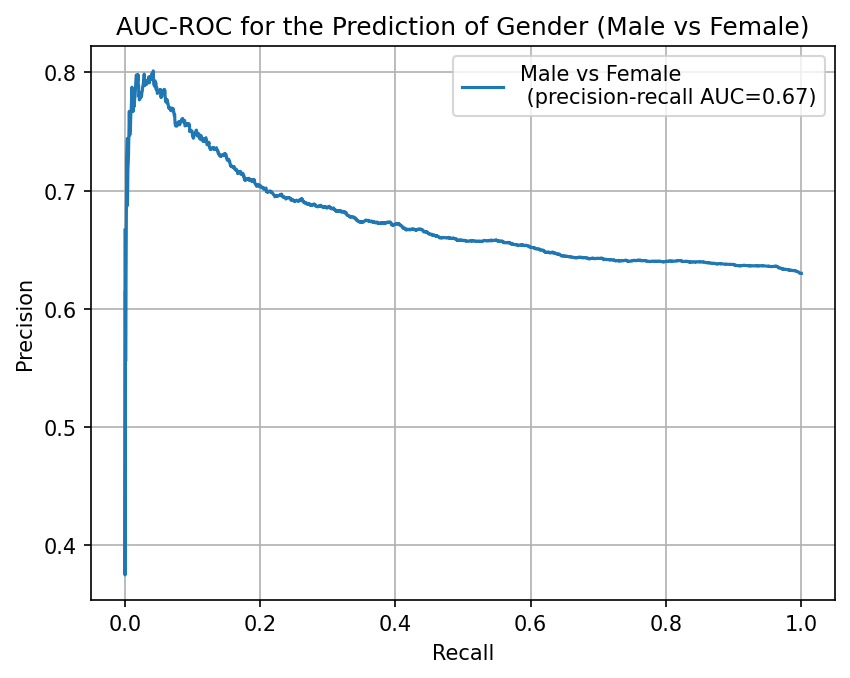

The optimum Threshold is: 0.53
              precision    recall  f1-score   support

         0.0       0.39      0.87      0.53      4961
         1.0       0.71      0.18      0.29      8448

    accuracy                           0.44     13409
   macro avg       0.55      0.53      0.41     13409
weighted avg       0.59      0.44      0.38     13409

[[4335  626]
 [6917 1531]]


In [45]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_1__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_segments_segment_1__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 944us/step


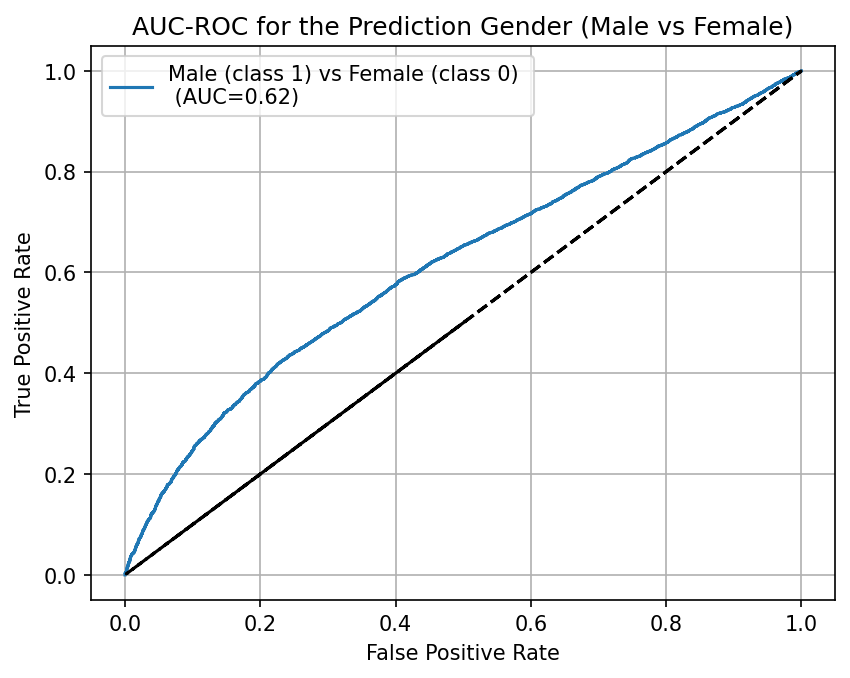

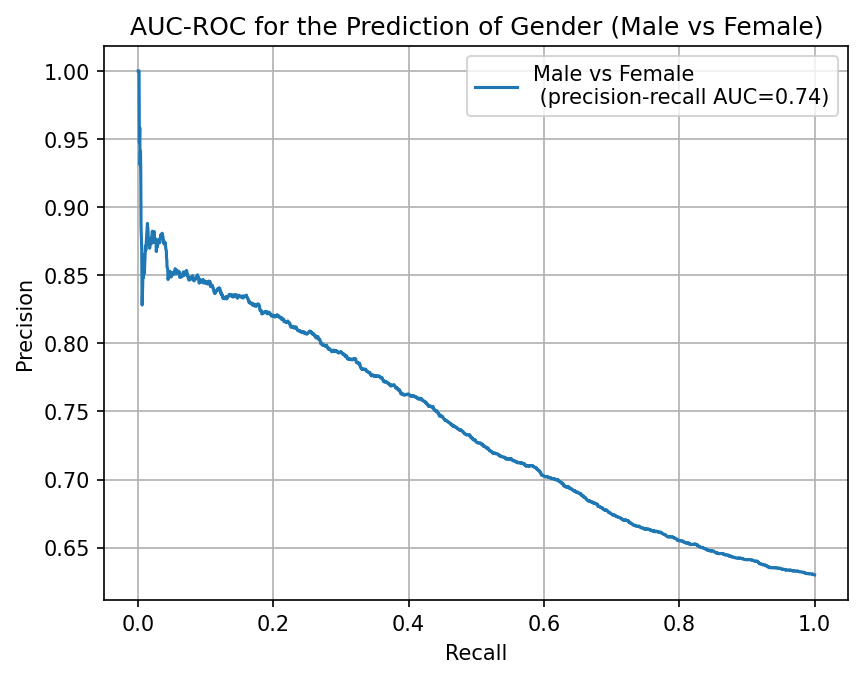

The optimum Threshold is: 0.59
              precision    recall  f1-score   support

         0.0       0.44      0.73      0.55      4961
         1.0       0.74      0.46      0.57      8448

    accuracy                           0.56     13409
   macro avg       0.59      0.59      0.56     13409
weighted avg       0.63      0.56      0.56     13409

[[3600 1361]
 [4554 3894]]


In [46]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_2__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_segments_segment_2__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)

420/420 [==============================] - 0s 893us/step


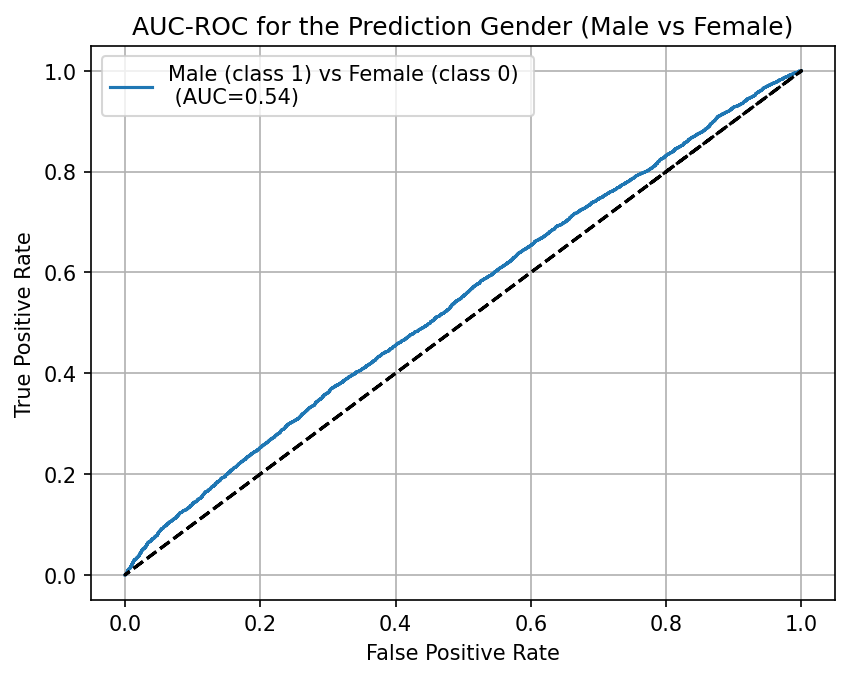

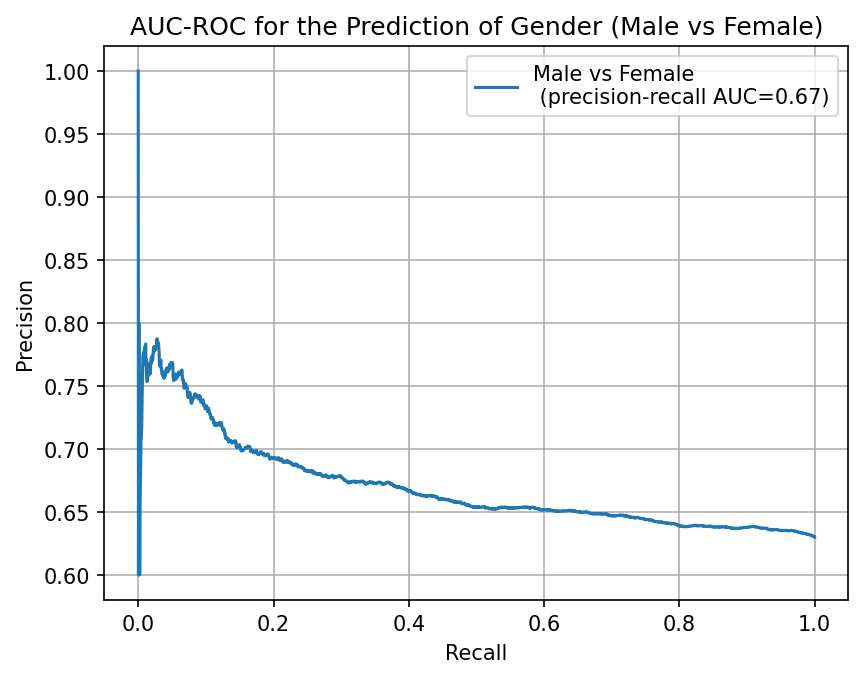

The optimum Threshold is: 0.53
              precision    recall  f1-score   support

         0.0       0.40      0.51      0.45      4961
         1.0       0.65      0.54      0.59      8448

    accuracy                           0.53     13409
   macro avg       0.52      0.53      0.52     13409
weighted avg       0.56      0.53      0.54     13409

[[2524 2437]
 [3849 4599]]


In [47]:
# chexpert age ful model eevaluated by NIH
name = 'nih_sex_segments_segment_3__'
model_chex_total = load_model(name + '_mdl.h5')  # loading the chexpert model
test_data = np.load('/Users/mra/Desktop/results/age_chexpert/mimic_sex_segments_segment_3__belongings.npy',allow_pickle=True).item()  # loading the NIH test data
x_chex_total = test_data['x_test'] # nih x test
y_chex_total = test_data['y_test'] # nih y test

mask = np.load(name + 'belongings.npy',allow_pickle=True).item()  # loadnig the chexpert data
mask_chex_total = mask['mask_excluded'] # loading the chexpert masks

#===================================
original_x = x_chex_total * np.tile(test_data['std'].reshape((1,-1)),reps=(x_chex_total.shape[0],1)) + np.tile(test_data['mean'].reshape((1,-1)),reps=(x_chex_total.shape[0],1))
x =  (original_x-np.tile(mask['mean'].reshape((1,-1)),reps=(original_x.shape[0],1)))/np.tile(mask['std'].reshape((1,-1)),reps=(original_x.shape[0],1))
y_predict_chex_total = model_chex_total.predict(x[:,mask_chex_total])

AUC_ROC_Binary(y_true=y_chex_total,y_score=y_predict_chex_total)
AUC_Precision_Recall(y_true=y_chex_total,y_score=y_predict_chex_total)
threshold = prob2categ(y_chex_total,y_predict_chex_total)
print('The optimum Threshold is: {:.2f}'.format(threshold))
class_pred = y_predict_chex_total.copy()
class_pred[class_pred>threshold]=1
class_pred[class_pred<=threshold]=0
print(classification_report(y_true=y_chex_total, y_pred=class_pred))
cm = confusion_matrix(y_true=y_chex_total, y_pred=class_pred)
print(cm)